### ***AUTHORS***
1. Kiprono Ben
2. Norman Mwapea
3. Pauline Kariuki
4. Wesley Owino
5. Judith Otieno
6. Alvin Kipleting

## BUSINESS UNDERSTANDING

### OVERVIEW

This is a Natural Language Processing (NLP)-driven sentiment analysis project designed to decode public opinion on two of the world’s most influential tech companies; **Apple** and **Google**. By leveraging machine learning techniques to analyze thousands of real tweets, the project aims to classify user sentiment as *positive*, *negative*, or *neutral*.  

This initiative demonstrates how social media analytics can provide actionable insights for companies seeking to understand consumer perceptions, monitor brand reputation, and anticipate market trends. Ultimately, the project serves as a prototype for a scalable, intelligent sentiment monitoring system applicable across industries.

### BACKGROUND

Social media has become the world’s largest real-time feedback loop. Millions of users share their thoughts daily about products, services, and brands; creating a goldmine of unstructured data that reveals how people truly feel.  
For technology companies like **Apple** and **Google**, such sentiment can directly influence *brand equity*, *purchase behavior*, and *public trust*. Tweets praising a product’s innovation or criticizing a software update can ripple across digital spaces, shaping collective opinion within hours.  
Understanding these emotional currents is therefore critical for modern businesses. Sentiment analysis transforms raw textual chatter into measurable, strategic insight—empowering companies to react faster, market smarter, and communicate better.

### OBJECTIVES

The main goals of the project are to:

1. Develop a Natural Language Processing (NLP) model that classifies tweets related to Apple and Google as *positive*, *negative*, or *neutral*.  
2. Preprocess and transform raw text into machine-readable features using tokenization, normalization, stopword removal, and TF-IDF vectorization.  
3. Evaluate multiple machine learning algorithms to identify the most accurate and interpretable classifier.  
4. Generate data-driven insights about brand sentiment patterns to support business and marketing decisions.  
5. Lay the groundwork for an automated brand intelligence system capable of tracking sentiment across multiple platforms and industries.

### SUCCESS METRICS

Success will be defined through a mix of technical and business outcomes:

- **Model Performance:** Achieving at least 80% F1-score across sentiment classes.  
- **Data Integrity:** Clean, balanced, and reproducible dataset suitable for future extensions.  
- **Interpretability:** Ability to visualize top sentiment-driving words and phrases for explainability.  
- **Insight Quality:** Sentiment trends that clearly reflect real-world brand perceptions.  
- **Scalability:** Modular design allowing future integration with streaming APIs for live monitoring.

### STAKEHOLDERS

The beneficiaries of this undertaking include:
  
- **Marketing Analysts:** Use sentiment insights to understand public opinion and campaign impact.  
- **Product Managers:** Monitor consumer feedback and sentiment shifts after product launches.  
- **Executives & Decision Makers:** Leverage findings to inform strategic brand and communication strategies.
- **Data Science & NLP Teams:** Responsible for model design, feature engineering, and evaluation.  
- **Research & Development Teams:** Explore applications of the model in broader domains like product reviews, customer feedback, and crisis management.

#### RELEVANCE

TechTones bridges the gap between data and perception. It shows how machine learning can turn the chaos of social media into structured intelligence; helping organizations not only track how people feel, but also why they feel that way.
This project highlights the growing role of NLP in business strategy, reputation management, and competitive intelligence, providing a strong proof of concept for sentiment analysis as a key driver of modern data-driven decision-making.

## DATA UNDERSTANDING
 
The dataset used in this project is sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 Tweets referencing Apple and Google products. Each Tweet has been annotated with information identifying the product or brand mentioned and the emotion expressed toward it. It offers a real-world foundation for supervised sentiment analysis in Natural Language Processing (NLP). This dataset was collected on August 30th, 2013, providing a snapshot of user opinions at that point in time.

It contains the following features with their descriptions:

| Feature | Description |
|--------------|----------------|
| tweet_text | The full text of each Tweet referencing Apple or Google products. |
| emotion_in_tweet_is_directed_at | The product or brand mentioned (e.g iPhone, iPad, Google, iPad/iPhone App). |
| is_there_an_emotion_directed_at_a_brand_or_product | The annotated sentiment label -> *Positive emotion*, *Negative emotion*, or *No emotion toward brand or product*. |

### EXPLORING THE DATA

We begin by loading the data and performing an initial exploration to get a sense of its structure and content. But first, we gather our essential tools; just as a painter readies their palette and brushes before creating a masterpiece.

In [1]:
# ======= [Import all relevant libraries] =======

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
from wordcloud import WordCloud         # Word Cloud
from wordcloud import STOPWORDS
from itertools import cycle

# String manipulation
import re

# Counting items
from collections import Counter

# NLP
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import RegexpTokenizer           # Tokenization
from nltk.corpus import stopwords                   # Stopwords
from nltk.stem import WordNetLemmatizer             # Lemmatization
from nltk import ngrams                             # N-Grams Analysis
from symspellpy import SymSpell, Verbosity

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ML
from sklearn.preprocessing import LabelEncoder, label_binarize , StandardScaler         # Encoding and scaling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import TruncatedSVD                                          # Dimensionality reduction
from sklearn.naive_bayes import MultinomialNB                                           # Naive Bayes
from sklearn.linear_model import LogisticRegression                                     # Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree                              # Decision Tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    classification_report
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

#!pip install symspellpy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Now we load the data.

In [2]:


df = pd.read_csv(
    r"C:\Users\PC\Desktop\DS projects\phase 4\Techtones\TechTones\Apple and Google Twitter Sentiments.csv",
    encoding="ISO-8859-1"
)

df.head()


tweet_text  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

*Observation:* The dataset is consistent and admittedly very messy.

Then we check the number of records and fatures we are working with.

In [3]:
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} features.")

The dataset has 9093 records and 3 features.


We’ve got over 9,000 records, a solid data haul. Let’s see how unique the dataset is.


In [4]:
# ======= [Dataset Uniqueness] =======

# Number of unique values in each column
print("Number of unique values in:", '\n')
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Unique values in each column
print("\nUnique Values in:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())

Number of unique values in: 

tweet_text: 9065 unique values
emotion_in_tweet_is_directed_at: 9 unique values
is_there_an_emotion_directed_at_a_brand_or_product: 4 unique values

Unique Values in:

tweet_text:
['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'
 ...
 "Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev"
 'Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.'
 '\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tes

*Observation:*

- There are over 9,065 unique tweet entries, meaning nearly every tweet in the dataset is distinct.
- These tweets are directed to 9 unique products, capturing a range of Apple and Google products (like iPhone, Android, iPad) and some general or unspecified mentions. The presence of NaN values suggests that some tweets don’t explicitly mention a product.
- There are 4 distinct emotional classifications, reflecting the sentiment intensity or clarity.

Based on this initial preview, it makes sense to standardize the column names; keeping them short, clear, and code friendly. We’ll rename them as follows:

In [5]:
# Rename the columns
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

# Preview new column names
df.columns

Index(['tweet', 'product', 'sentiment'], dtype='object')

We further check the metadata.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


*Interpretation:*

- All fields are categorical which is consistent with the data as it is in text format.
- tweet: Almost complete, with 9,092 non-null values, meaning only one missing entry.
- product: Has 3,291 non-null values, showing that about 36% of tweets mention a specific Apple or Google product. The rest are either general statements or lack a clear product reference.
- sentiment: Fully populated.

Next, we aim to deepen our understanding of the dataset by exploring the descriptive statistics of each column.

In [7]:
df.describe(include='O').T

count unique  \
tweet      9092   9065   
product    3291      9   
sentiment  9093      4   

                                                                                                                      top  \
tweet      RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
product                                                                                                              iPad   
sentiment                                                                              No emotion toward brand or product   

           freq  
tweet         5  
product     946  
sentiment  5389

*Observation:*

We observe that:

- The most repeated tweet appears only 5 times, suggesting very little duplication.
- Products (product): Out of all the 9 distinct products, iPads lead the conversation -> mentioned 946 times, indicating a strong public interest in them.
- The dataset is dominated by neutral or indifferent opinions -> 'No emotion toward brand or product' appears 5,389 times, making up more than half the data. This suggests that while people talk about these brands a lot, many tweets don’t clearly express positive or negative emotions -> neutrality.

### DATA QUALITY CHECK

In [8]:
# ======= [Check for duplicates and missing values] =======

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Check for missing values and missingness percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage missingness:\n", missing_info)

Duplicates: 22

Missing values and percentage missingness:
            Missing Values  Percentage
tweet                   1    0.010997
product              5802   63.807324
sentiment               0    0.000000


*Comment on data quality:*

Yikes! The product column has more than half of its values missing; we’ll address that appropriately. There are also 22 duplicate records, which we’ll remove, along with any rows containing null tweets.

# DATA CLEANING AND PREPARATION

To enable meaningful analysis, we must first clean and prepare the data through the following cleaning and preprocessing steps:

#### 1. Drop duplicate rows and nulls only in tweet columns.

In [9]:
# Drop duplicates and nulls 
df = df.drop_duplicates().dropna(subset=['tweet'])

# Sanity check
# Re-check for duplicates
print("Duplicates:", df.duplicated().sum())

# Re-check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values})
print("\nMissing values:\n", missing_info)

Duplicates: 0

Missing values:
            Missing Values
tweet                   0
product              5788
sentiment               0


#### 2. Dealing missing values in product column

We begin by inspecting the null values in the product column in relation to the tweet content to determine whether any clues about the missing product can be inferred from the tweet.

In [10]:
# Examine tweets with missing product values 
# to identify potential product mentions within the text
df[df['product'].isna()][['tweet', 'product']]

tweet  \
5          @teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd   
16                                                         Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw   
32                                                  Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}   
33                                                                                                        Anyone at  #sxsw want to sell their old iPad?   
34                                                                        Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?   
...                                                                                                                                                 ...   
9087                                                @mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention   
9089                      Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles   
9090  Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev   
9091       Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.   
9092                                           Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}   

     product  
5        NaN  
16       NaN  
32       NaN  
33       NaN  
34       NaN  
...      ...  
9087     NaN  
9089     NaN  
9090     NaN  
9091     NaN  
9092     NaN  

[5788 rows x 2 columns]

From the inspection, it’s evident that several tweets with missing product values actually contain clues about the product within the text itself. However, the current tweet column is too noisy to analyze effectively. It needs cleaning and preprocessing first.

After preprocessing, we’ll create a mapping strategy to standardize product mentions:
- Any Apple-related terms (e.g iPhone, iPad) will be grouped under Apple.
- All other identifiable products will be categorized under Google.

## PREPROCESSING STEPS:

1. Convert all tweets to lowercase for uniformity.
2. Remove stopwords to eliminate irrelevant filler words.
3. Strip punctuation and special characters.
4. Tokenize the text to break it into analyzable units.
5. Apply lemmatization to reduce words to their root form.

In [11]:
# ======= [Text Preprocessing Pipeline — SymSpell Version] =======

# Ensure dependencies
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Tokenizer & Lemmatizer
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

# Stopword customization
keep_words = {'not', 'no', 'nor', 'never', 'very', 'really', 'so', 'too', 'quite', 'extremely', 'absolutely'}
custom_stops = {'rt', 'lol', 'omg', 'u', 'ur', 'ya', 'im', 'amp', 'htt', 'co'}
stopwords_list = (set(stopwords.words('english')) | custom_stops) - keep_words

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", 0, 1)

# Utility: Detect noisy tokens
def is_weird_token(word):
    if len(word) <= 2 or re.search(r'\d+[a-z]+|[a-z]+\d+', word):
        return True
    if re.search(r'[_\-]+|(.)\1{2,}', word):
        return True
    vowels = sum(1 for ch in word if ch in 'aeiou')
    if vowels == 0 or vowels / len(word) < 0.25 or re.search(r'[qxz]{2,}', word):
        return True
    return False

# Word Correction using SymSpell
def correct_word(word):
    suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
    return suggestions[0].term if suggestions else word

# Main Cleaning Function
def janitor(text):
    text = str(text).lower()
    text = re.sub(r"’", "'", text)

    contractions = {
        "n't": " not", "'re": " are", "'s": " is", "'ll": " will",
        "'ve": " have", "'m": " am", "'d": " would"
    }
    for c, e in contractions.items():
        text = text.replace(c, e)

    text = re.sub(r"http\S+|www\S+|@\w+|#", "", text)
    text = re.sub(r"[^\x00-\x7F]+|\b\d{1,2}(am|pm)\b|\b\d+\b", "", text)

    text = text.replace(':)', ' positiveemot ').replace(':(', ' negativeemot ')
    tokens = tokenizer.tokenize(text)

    clean_tokens = [
        lemmatizer.lemmatize(correct_word(w))
        for w in tokens
        if w not in stopwords_list and not is_weird_token(w)
    ]
    return clean_tokens


# Apply to Dataset
df['tokens'] = df['tweet'].astype(str).apply(janitor)
df['clean_tweet'] = df['tokens'].apply(lambda x: ' '.join(x))

# Preview changes
df.sample(7)

tweet  \
7402                                                     At the Apple pop up store on congress. iPad 2s everywhere. #sxsw #mosaicxm   
7875                                                    #Posterous Joins The #SXSW Pile On With Posterous Events For #iPhone {link}   
7369                                                                                          {link} #iphone #kneejockey #ftw #sxsw   
6302                          RT @mention Marissa Meyer about Google New concept &quot;The Power of Here&quot; {link} #SXSW #Google   
8509  This @mention article about #SXSW is so good I'm linking to it on an iPhone on a train, which is the opposite of easy: {link}   
8676             Kind of funny/sad that the iPad release line was longer than any party lines (i saw) at #sxsw last night. #sheeple   
8894                                        @mention what size did you get? Did you got the apple pop store they opened up at #sxsw   

     product                           sentiment  \
7402     NaN  No emotion toward brand or product   
7875     NaN  No emotion toward brand or product   
7369     NaN  No emotion toward brand or product   
6302     NaN  No emotion toward brand or product   
8509     NaN                        I can't tell   
8676    iPad                    Positive emotion   
8894     NaN  No emotion toward brand or product   

                                                                       tokens  \
7402                  [apple, pop, store, congress, ipad, everywhere, mosaic]   
7875                        [poster, join, pile, poster, event, iphone, link]   
7369                                               [link, iphone, kneejockey]   
6302  [marissa, meyer, google, new, concept, quot, power, quot, link, google]   
8509            [article, good, linking, iphone, train, opposite, easy, link]   
8676       [kind, sad, ipad, release, line, longer, line, saw, last, steeple]   
8894                              [size, get, got, apple, pop, store, opened]   

                                                       clean_tweet  
7402               apple pop store congress ipad everywhere mosaic  
7875                     poster join pile poster event iphone link  
7369                                        link iphone kneejockey  
6302  marissa meyer google new concept quot power quot link google  
8509          article good linking iphone train opposite easy link  
8676       kind sad ipad release line longer line saw last steeple  
8894                           size get got apple pop store opened

Awesome! Now we map the products into just Apple and Google.

In [12]:
# Define mapping rules
apple_products = [
    'iPhone', 'iPad or iPhone App', 'iPad', 
    'Apple', 'Other Apple product or service'
]

google_products = [
    'Google', 'Android', 'Android App', 
    'Other Google product or service'
]

# Map. Only assign if in the specific list, otherwise keep NaN
df['product'] = df['product'].apply(
    lambda x: 'Apple' if x in apple_products else ('Google' if x in google_products else np.nan)
)

# Check distribution after mapping
df['product'].value_counts(dropna=False)

product
NaN       5788
Apple     2404
Google     878
Name: count, dtype: int64

Now that we have tokenized the tweets, we can leverage these tokens to infer product associations. By examining keywords in the tokens; such as 'iphone', 'ipad', 'android', and 'google', we can impute the missing product values for tweets that didn't have explicit product labels.

In [13]:
# Examine tokens with missing product values 
# to identify potential product mentions within the text 
# and use that to impute the missing values
df[df['product'].isna()][['tokens', 'product']]

tokens  \
5                               [new, ipad, apps, speechtherapy, communication, showcased, conference, year, chat, and]   
16                                                                        [holler, gram, ipad, itunes, app, store, via]   
32                                                 [attn, friend, register, gdgtlive, see, cobra, radar, android, link]   
33                                                                                      [anyone, want, sell, old, ipad]   
34                                                                 [anyone, bought, new, ipad, want, sell, older, ipad]   
...                                                                                                                 ...   
9087                                                                          [yup, not, app, yet, android, suggestion]   
9089                        [wave, interrupt, regularly, scheduled, geek, programming, big, news, link, google, circle]   
9090  [google, geiger, physician, never, reported, potential, yet, ada, relies, physician, quot, operating, data, quot]   
9091           [verizon, iphone, customer, complained, time, fell, back, hour, weekend, course, new, yorkers, attended]   
9092                                                                                              [google, offer, link]   

     product  
5        NaN  
16       NaN  
32       NaN  
33       NaN  
34       NaN  
...      ...  
9087     NaN  
9089     NaN  
9090     NaN  
9091     NaN  
9092     NaN  

[5788 rows x 2 columns]

Defining our imputation pipeline.

In [14]:
# ======= [Product imputation pipeline using clean_tweet] =======

def impute_product(row):

    '''
    Using tokens to find brand-specific keywords 
    and impute missing product values accordingly.
    '''
    
    # If product is already filled, keep it
    if pd.notna(row['product']):
        return row['product']
    
    text = row['tokens']

    # Define keyword banks
    apple_keywords = [
        'iphone', 'ipad', 'apple', 'itunes', 'ipad2', 'mac', 'mini',
        'ipod', 'macbook', 'ios', 'air', 'pro', 'imac', 'siri',
        'lightning', 'facetime', 'safari', 'osx', 'icloud', 'snow',
        'leopard', 'lion', 'applecare', 'steve', 'jobs', 'tim', 'cook',
        'ive', 'phil', 'schiller', 'scott', 'forstall', 'craig', 'federighi'
        'os', 'jony', 'jonathan', 'airdrop', 'imessage'
    ]

    google_keywords = [
        'google', 'android', 'maps', 'chrome', 'chromium', 'gmail', 'pixel', 
        'nexus', 'workspace', 'assistant', 'nest', 'meet', 'translate', 'drive' 
        'duo', 'ads', 'circle', 'marissa', 'map', 'doc', 'docs', 'earth', 'hangouts'
        'mayer', 'search', 'ad', 'googles', 'wallet', 'youtube', 'honeycomb', 
        'jellybean', 'icecreamsandwich', 'gingerbread', 'chromebook', 'glass', 
        'plus', 'google+', 'chromecast', 'galaxy', 'larry', 'page', 'sergey', 'brin', 
        'eric', 'schmidt', 'sundar', 'pichai', 'voice', 'adwords', 'adsense', 'labs',
        'blogger', 'social', 'network'
    ]
    
    # Keyword detection
    if any(keyword in text for keyword in apple_keywords):
        return 'Apple'
    
    if any(keyword in text for keyword in google_keywords):
        return 'Google'
    
    return np.nan

# Apply to DataFrame
df['product'] = df.apply(impute_product, axis=1)

# Check new distribution
df['product'].value_counts(dropna=False)

product
Apple     5554
Google    2878
NaN        638
Name: count, dtype: int64

Excellent! Our keyword-based imputation reduced missing product values from over 5,000 down to 618! Now let's analyze the tokens from the remaining null entries to identify any additional patterns we can use for imputation.

In [15]:
df[df['product'].isna()][['clean_tweet', 'product']]

clean_tweet  \
52                                           link chat musedchat classical newtwitter   
53                                            location based fast fun future link via   
66                                                           wanna buy fado link join   
73    gorilla promise launch foursquare group reward type service finger crossed link   
77                                                                       worship link   
...                                                                               ...   
8932                                          news good news link code valid infected   
8936                client news release quot dope melody heavy bass quot invades link   
8970                       year downloading music torrent link free legal great music   
9024                             way looking spanish speaking scout based austin link   
9026                      true rated amy ice cream quot best ice cream town quot link   

     product  
52       NaN  
53       NaN  
66       NaN  
73       NaN  
77       NaN  
...      ...  
8932     NaN  
8936     NaN  
8970     NaN  
9024     NaN  
9026     NaN  

[638 rows x 2 columns]

The remaining tokens offer no meaningful product indicators. We'll drop the 618 null entries to ensure dataset completeness and reliability.

In [16]:
# Drop nulls in product column
df = df.dropna(subset=['product'])

# Check resultant shape after cleaning
print(f"The dataset now has {df.shape[0]} records and {df.shape[1]} features after cleaning.")

# Final completeness preview
print("\nMissing Values after cleaning:\n", df.isna().sum())

The dataset now has 8432 records and 5 features after cleaning.

Missing Values after cleaning:
 tweet          0
product        0
sentiment      0
tokens         0
clean_tweet    0
dtype: int64


## EXPLORATORY DATA ANALYSIS (EDA)

Now that the data is clean and preprocessed, we are ready to build intuition about it. This phase is all about understanding what the data reveals; its structure, composition, and underlying sentiment cues. We examine how emotions are distributed across Apple and Google mentions, identify common product references, and explore linguistic patterns shaping public perception.

Once we have a solid grasp of the data’s texture, we’ll transition into a deeper Text Analysis, dissecting the language used in tweets to uncover emotional triggers, word associations, and brand-specific language trends.

### 1. Frequency of Apple Vs. Google

=== Distribution of Product Mentions ===
product
Apple     5554
Google    2878


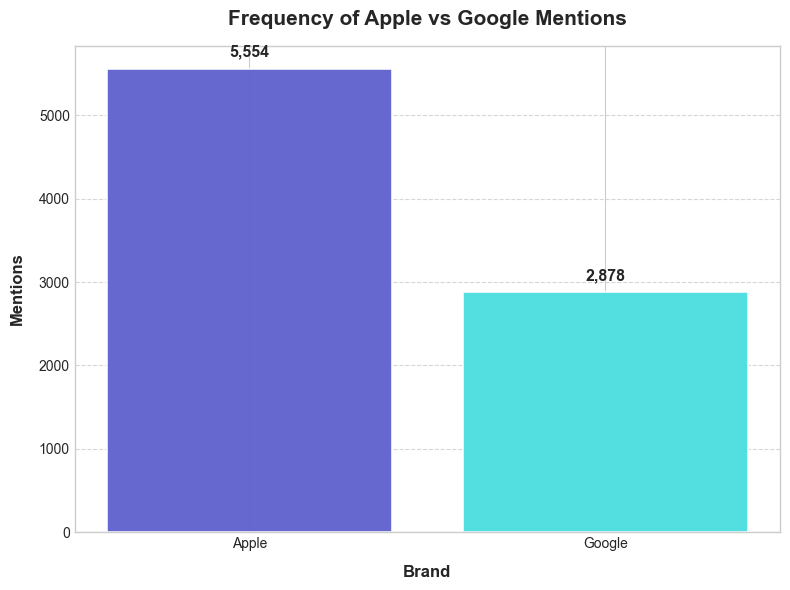

In [17]:
# Data summary
counts = df["product"].value_counts()
print("=== Distribution of Product Mentions ===")
print(counts.to_string())  

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))

brands = counts.index
values = counts.values

# Palette
palette = ["#5E60CE", "#4ADEDE"]

# Bar Plot
bars = ax.bar(
    brands, 
    values, 
    color=palette, 
    edgecolor="white", 
    linewidth=1.2, 
    alpha=0.95
)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (max(values) * 0.02),
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=11.5,
        fontweight="semibold",
    )

# Labels
ax.set_title("Frequency of Apple vs Google Mentions", fontsize=15, fontweight="semibold", pad=15)
ax.set_xlabel("Brand", fontsize=12, fontweight="semibold", labelpad=10)
ax.set_ylabel("Mentions", fontsize=12, fontweight="semibold", labelpad=10)

# Grid & Spines
ax.grid(axis='y', linestyle='--', alpha=0.8)
ax.set_axisbelow(True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:* Apple is the most frequently mentioned product in the dataset, indicating a higher level of engagement compared to Google.

### 2. Sentiment Distribution

=== Sentiment Distribution Summary ===
Neutral   : 4,906 (58.2%)
Positive  : 2,959 (35.1%)
Negative  : 567 (6.7%)


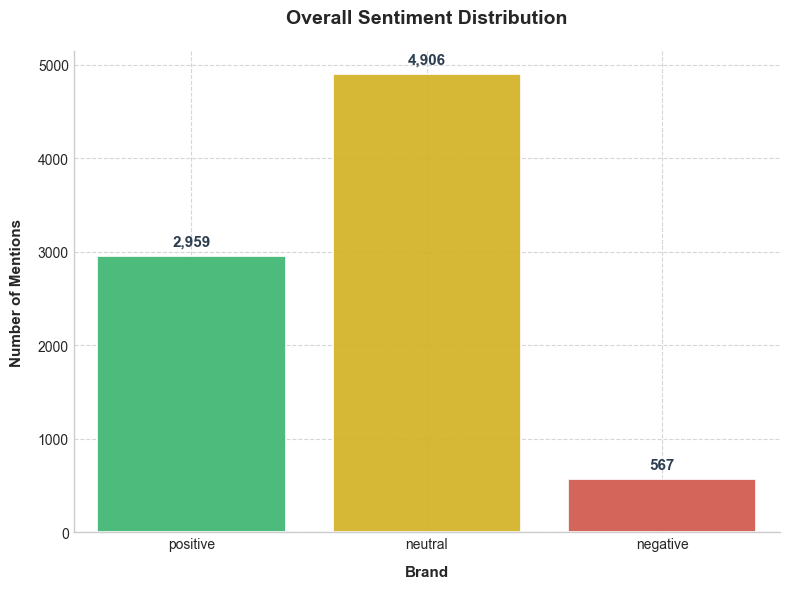

In [18]:
# Simplify Sentiment Labels
df['sentiment'] = df['sentiment'].replace({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
})

# Count Summary
sentiment_counts = df['sentiment'].value_counts()
total = sentiment_counts.sum()
sentiment_percent = (sentiment_counts / total * 100).round(1)

print("=== Sentiment Distribution Summary ===")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment.capitalize():<10}: {count:,} ({sentiment_percent[sentiment]}%)")

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Color Palette
palette = {
    'positive': '#2ECC71',  
    'neutral':  '#F1C40F', 
    'negative': '#E74C3C'   
}

# Plot
bars = sns.countplot(
    data=df,
    x="sentiment",
    order=["positive", "neutral", "negative"],
    palette=palette,
    edgecolor="white",
    linewidth=1.3,
    alpha=0.95,
    ax=ax
)

# Annotate bars
for p in bars.patches:
    height = p.get_height()
    label = f"{int(height):,}"
    ax.text(
        p.get_x() + p.get_width()/2,
        height + (max(sentiment_counts)*0.015),
        label,
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="semibold",
        color="#2C3E50"
    )

# Title and Labels
ax.set_title("Overall Sentiment Distribution", fontsize=14, fontweight="semibold", pad=20)
ax.set_xlabel("Brand", fontsize=11, fontweight="semibold", labelpad=10)
ax.set_ylabel("Number of Mentions", fontsize=11, fontweight="semibold", labelpad=10)

# Grid and spines polish
ax.grid(axis='both', linestyle='--', alpha=0.8)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:* Most people are sitting on the fence with neutral sentiment. Among those who do have an opinion, it's overwhelmingly positive.

### 3. Top mentioned product per brand

=== Apple Product Mentions ===
 Product  Mentions
    ipad      2513
  iphone      1569
  itunes        96
    ipod        25
ipad air         6
  safari         5

=== Google Product Mentions ===
   Product  Mentions
   android       413
    chrome        21
     pixel         3
      nest         1
google pay         1


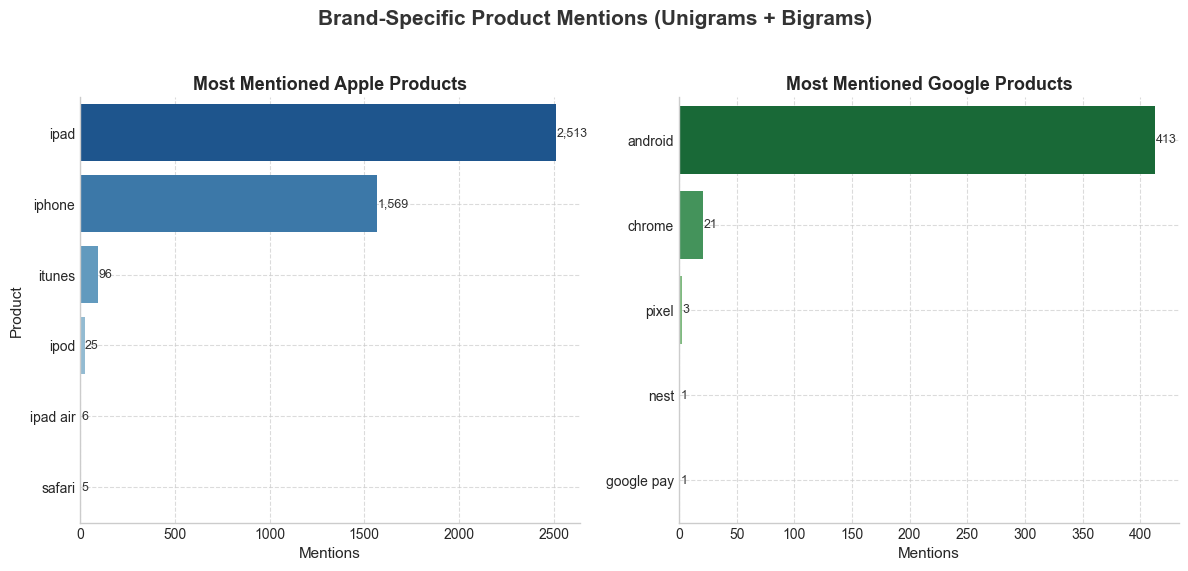

In [19]:
# Brand-Specific Products
apple_products = [
    'iphone', 'ipad', 'ipod', 'macbook', 'imac', 'mac pro', 'ipad mini',
    'ipad air', 'macbook pro', 'macbook air', 'iphone 5s', 'iphone 5c',
    'ios 7', 'itunes', 'itunes radio', 'iwork icloud', 'ilife 13', 'siri',
    'facetime', 'safari', 'lightning'
]

google_products = [
    'android', 'chrome', 'gmail', 'google maps', 'google meet', 'google ads',
    'google pay', 'pixel', 'nexus 7', 'workspace', 'google assistant',
    'alexa', 'nest', 'google drive', 'google play', 'google keep',
    'chromebook pixel', 'android jelly', 'google drive'
]

# Function to extract unigrams and bigrams from tokens
def get_ngrams(tokens):
    unigrams = tokens
    bigrams = [' '.join(bigram) for bigram in ngrams(tokens, 2)]
    return unigrams + bigrams

# Function to count product mentions
def count_mentions(tokens_list, keywords):
    token_ngrams = get_ngrams(tokens_list)
    return [tg for tg in token_ngrams if tg in keywords]

# Filter data by brand
apple_df = df[df["product"].str.lower() == "apple"]
google_df = df[df["product"].str.lower() == "google"]

# Count mentions
apple_mentions = Counter(
    tg for tokens in apple_df["tokens"] for tg in count_mentions(tokens, apple_products)
)
google_mentions = Counter(
    tg for tokens in google_df["tokens"] for tg in count_mentions(tokens, google_products)
)

# Convert to DataFrames
def mentions_to_df(counter):
    return (
        pd.DataFrame(counter.items(), columns=["Product", "Mentions"])
        .sort_values("Mentions", ascending=False)
        .reset_index(drop=True)
    )

apple_mentions_df = mentions_to_df(apple_mentions)
google_mentions_df = mentions_to_df(google_mentions)

# Display
print("=== Apple Product Mentions ===")
print(apple_mentions_df.to_string(index=False))
print("\n=== Google Product Mentions ===")
print(google_mentions_df.to_string(index=False))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))
plt.suptitle(
    "Brand-Specific Product Mentions (Unigrams + Bigrams)",
    fontsize=15,
    fontweight="semibold",
    color="#333",
    y=1.03
)

def plot_mentions(ax, data, title, palette):
    sns.barplot(
        data=data,
        y="Product",
        x="Mentions",
        palette=palette,
        ax=ax
    )
    ax.set_title(title, fontsize=13, fontweight="semibold")
    ax.set_xlabel("Mentions", fontsize=11)
    ax.set_ylabel("Product" if "Apple" in title else "", fontsize=11)
    ax.grid(axis='both', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    for bar in ax.patches:
        width = int(bar.get_width())
        ax.text(
            width + 0.3,
            bar.get_y() + bar.get_height()/2,
            f"{width:,}",
            va='center',
            ha='left',
            fontsize=9,
            color="#333"
        )

plot_mentions(axes[0], apple_mentions_df, "Most Mentioned Apple Products", "Blues_r")
plot_mentions(axes[1], google_mentions_df, "Most Mentioned Google Products", "Greens_r")

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

*Observation:*

- Apple dominates the conversation:
    - Apple products appear far more frequently than Google products in this dataset.
    - The iPad (2,511 mentions) and iPhone (1,569 mentions) are by far the most discussed Apple products, showing strong user focus on tablets and smartphones.
- Other Apple products are mentioned sparingly:
    - iTunes (96 mentions) comes next, but everything else- MacBook, iPod, FaceTime, Safari, MacBook Pro/Air; is mentioned very little (under 30 mentions each).
    - This suggests Twitter users in this dataset are primarily talking about Apple’s mobile devices rather than laptops, desktops, or software.

- Google has limited product discussion:
- Android (398 mentions) dominates Google mentions, while Chrome (12) and Pixel (3) are tiny in comparison.
- Other Google products like Gmail, Nest, Google Play, and Google Pay have almost no mentions.

### 4. Users sentiments about the tech brands.

=== Emotion Counts per Product ===
sentiment  negative  neutral  positive
product                               
Apple           416     3006      2132
Google          151     1900       827


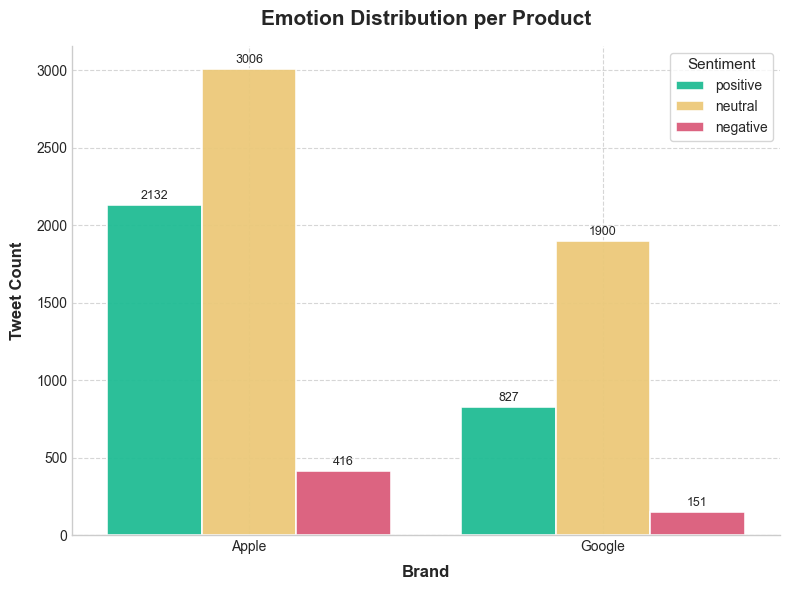

In [20]:
# Emotion Counts per Product
print("=== Emotion Counts per Product ===")
print(df.groupby("product")["sentiment"].value_counts().unstack().fillna(0).astype(int))

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Visualise
palette = ["#06D6A0", "#FFD166", "#EF476F"]
sns.countplot(
    data=df,
    x="product",
    hue="sentiment",
    hue_order=["positive", "neutral", "negative"],
    palette=palette,
    edgecolor="white",
    linewidth=1.2,
    alpha=0.95,
    ax=ax
)

# Annotate Bars 
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Grid and spines
ax.grid(axis="both", linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Titles and labels
ax.set_title("Emotion Distribution per Product", fontsize=15, fontweight="bold", pad=15)
ax.set_xlabel("Brand", fontsize=12, fontweight="semibold", labelpad=8)
ax.set_ylabel("Tweet Count", fontsize=12, fontweight="semibold", labelpad=8)

# Legend
ax.legend(title="Sentiment", title_fontsize=11, fontsize=10, loc="upper right", frameon=True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observaton:*

- Apple dominates both in volume and emotional pull. Most mentions are neutral but the positive tone still outweighs the negative by a solid margin- pointing to overall satisfaction and strong brand affinity despite occasional criticism.
- Google, meanwhile, sees a smaller and calmer conversation. The majority of mentions are neutral, fewer are positive, and negative sentiment is low. It’s a steadier, less emotional discourse.

### 6. Emotional tagging using wordclouds.

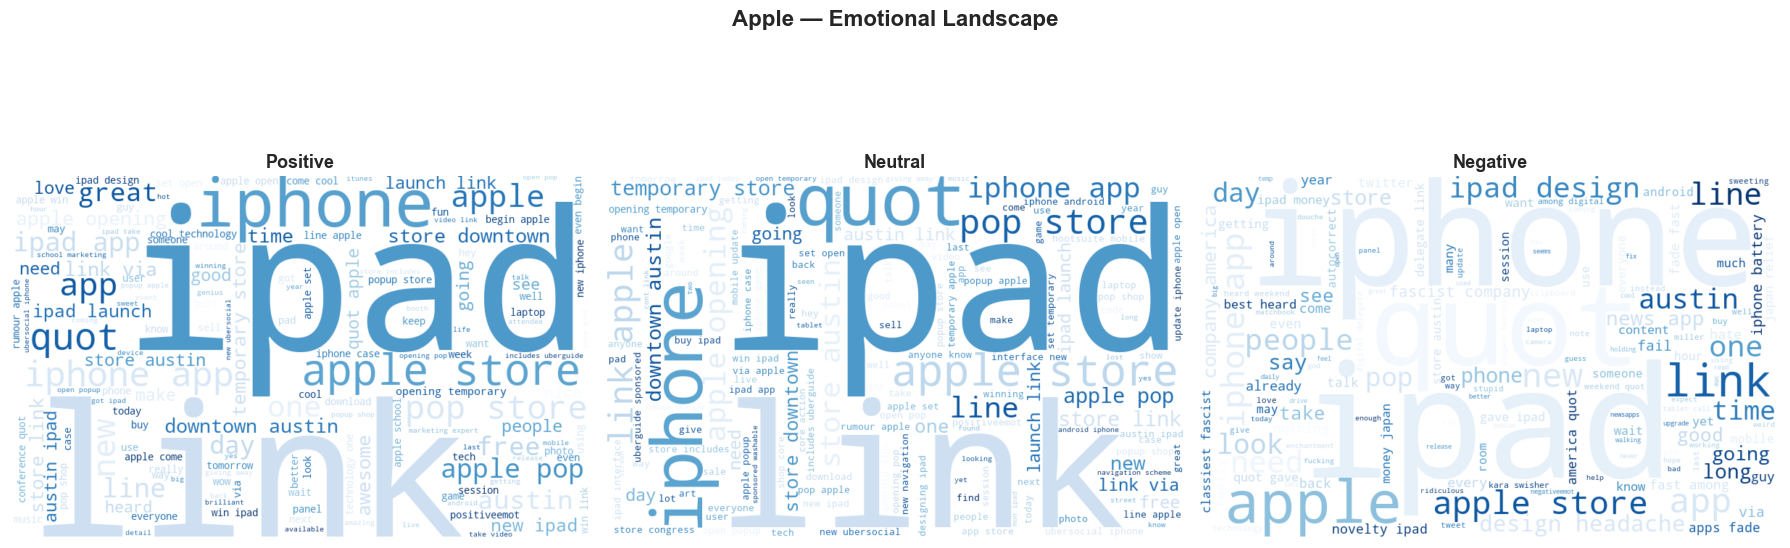

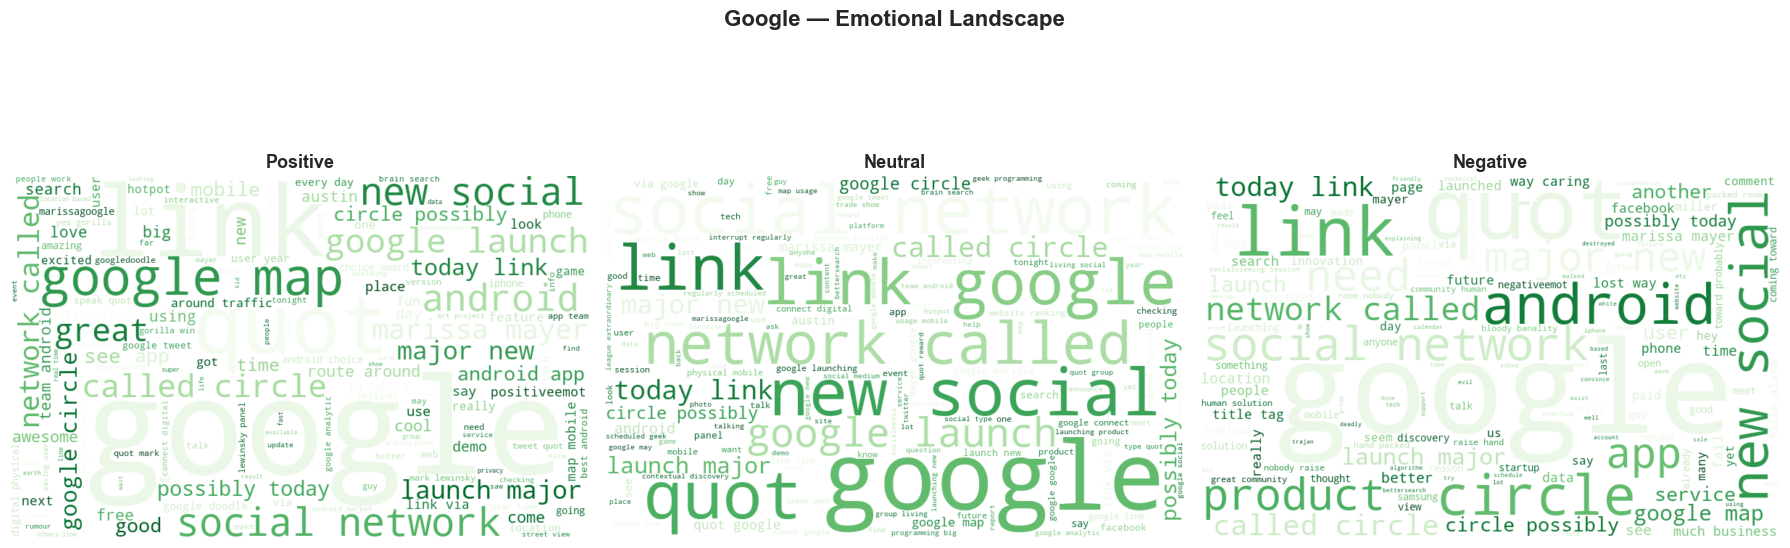

In [21]:
# Function to generate word clouds
def plot_wordclouds(df, brand, sentiments, ncols=3):
    fig, axes = plt.subplots(1, ncols, figsize=(18, 6), facecolor="white")
    fig.suptitle(f"{brand} — Emotional Landscape", fontsize=16, fontweight="semibold", y=1.05)

    for i, sent in enumerate(sentiments):
        subset = df[(df["product"] == brand) & (df["sentiment"] == sent)]
        text = " ".join(subset["clean_tweet"].astype(str).tolist())

        if not text.strip():
            axes[i].text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
            axes[i].axis("off")
            continue

        wc = WordCloud(
            width=800,
            height=500,
            background_color="white",
            colormap=("Greens" if brand == "Google" else "Blues"),
            max_words=150,
            contour_color="#1e293b",
            contour_width=1.2,
            random_state=42,
        ).generate(text)

        axes[i].imshow(wc, interpolation="bilinear")
        axes[i].set_title(sent.capitalize(), fontsize=13, fontweight="semibold")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Sentiments
sentiments = ["positive", "neutral", "negative"]

# Generate word clouds for both brands
plot_wordclouds(df, "Apple", sentiments)
plot_wordclouds(df, "Google", sentiments)

### 5. Average tweet length across sentiment classes.

=== Average Tweet Length per Brand ===
product  tweet_length
 Google      9.386379
  Apple      8.857760

=== Average Tweet Length per Sentiment Class ===
product sentiment  tweet_length
  Apple  negative      9.353365
  Apple  positive      8.864447
  Apple   neutral      8.784431
 Google  negative     10.304636
 Google  positive      9.559855
 Google   neutral      9.237895


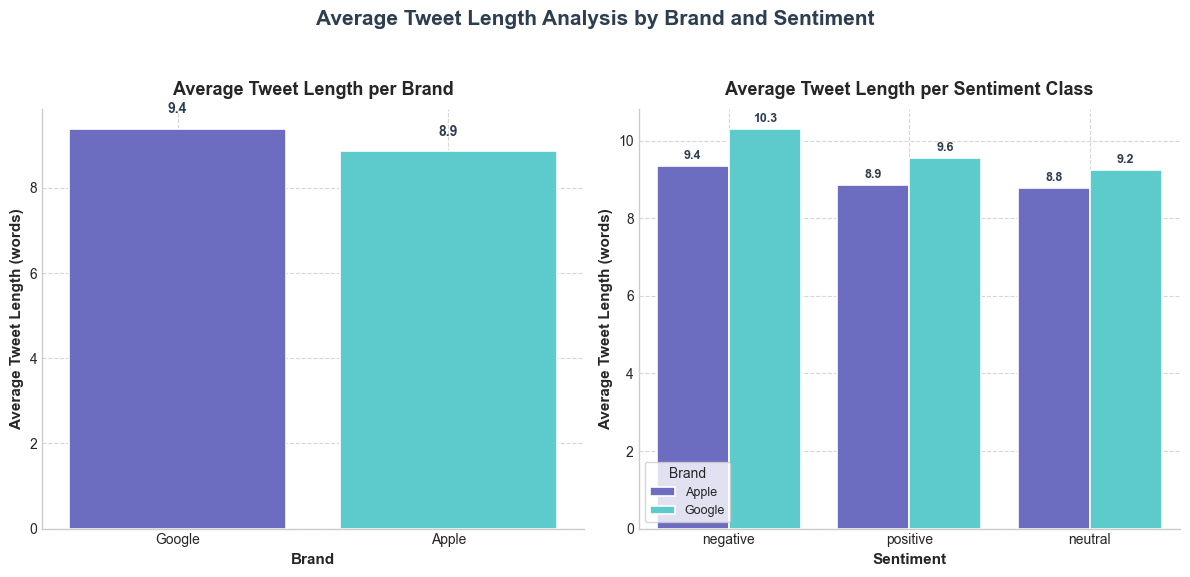

In [22]:
# Create a Safe Copy 
tweet_df = df.copy(deep=True)

# Compute Tweet Length
tweet_df["tweet_length"] = tweet_df["clean_tweet"].astype(str).apply(lambda x: len(x.split()))

# Average Tweet Length per Brand
brand_length = (
    tweet_df.groupby("product", as_index=False)["tweet_length"]
    .mean()
    .sort_values(by="tweet_length", ascending=False)
)

print("=== Average Tweet Length per Brand ===")
print(brand_length.to_string(index=False))

# Average Tweet Length per Brand & Sentiment
sentiment_length = (
    tweet_df.groupby(["product", "sentiment"], as_index=False)["tweet_length"]
    .mean()
    .sort_values(by=["product", "tweet_length"], ascending=[True, False])
)

print("\n=== Average Tweet Length per Sentiment Class ===")
print(sentiment_length.to_string(index=False))

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))
plt.suptitle(
    "Average Tweet Length Analysis by Brand and Sentiment",
    fontsize=15,
    fontweight="bold",
    color="#2C3E50",
    y=1.04
)

# Palettes
brand_palette = ["#5E60CE", "#4ADEDE"] 
sentiment_palette = {"positive": "#2ECC71", "neutral": "#F1C40F", "negative": "#E74C3C"}

# Average Tweet Length per Brand
sns.barplot(
    data=brand_length,
    x="product",
    y="tweet_length",
    palette=brand_palette,
    edgecolor="white",
    linewidth=1.2,
    ax=axes[0]
)

axes[0].set_title("Average Tweet Length per Brand", fontsize=13, fontweight="semibold", pad=10)
axes[0].set_xlabel("Brand", fontsize=11, fontweight="semibold")
axes[0].set_ylabel("Average Tweet Length (words)", fontsize=11, fontweight="semibold")
axes[0].grid(axis="both", linestyle="--", alpha=0.7)
axes[0].set_axisbelow(True)

# Annotate Bars
for bar in axes[0].patches:
    value = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.3,
        f"{value:.1f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="semibold",
        color="#2C3E50"
    )

# Average Tweet Length per Sentiment Class 
sns.barplot(
    data=sentiment_length,
    x="sentiment",
    y="tweet_length",
    hue="product",
    palette=brand_palette,
    edgecolor="white",
    linewidth=1.2,
    ax=axes[1]
)

axes[1].set_title("Average Tweet Length per Sentiment Class", fontsize=13, fontweight="semibold", pad=10)
axes[1].set_xlabel("Sentiment", fontsize=11, fontweight="semibold")
axes[1].set_ylabel("Average Tweet Length (words)", fontsize=11, fontweight="semibold")
axes[1].legend(title="Brand", title_fontsize=10, fontsize=9, frameon=True, loc="lower left")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_axisbelow(True)

# Annotate Bars
for container in axes[1].containers:
    axes[1].bar_label(
        container,
        fmt="%.1f",
        fontsize=9,
        padding=3,
        fontweight="semibold",
        color="#2C3E50"
    )

# Grid styling
for ax in axes:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.grid(axis="both", linestyle="--", alpha=0.8)
    ax.set_axisbelow(True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:*

- Tweets about Google tend to be slightly longer on average than those about Apple, hinting that people use more words when talking about Google- maybe to explain features, share experiences, or express opinions that need context.
- Within each brand:
    - For Apple, tweet length barely changes across sentiments; whether positive or negative, people keep it short and punchy.
    - For Google, negative tweets are the longest, followed by positive ones, suggesting that when users complain or praise, they go into more detail.
- Apple talk is concise and reactive; Google talk is wordier and more explanatory. People say more when they’ve got something to critique or appreciate.

### 6. What were the top words for each brand and sentiment.


=== Top Words for Apple positive ===
  Word  Count
  ipad   1021
 apple    923
  link    916
 store    554
iphone    535
   app    321
  quot    272
austin    265
   new    222
   pop    213

=== Top Words for Apple negative ===
  Word  Count
  ipad    195
iphone    160
  quot    127
 apple    123
  link     61
   app     52
 store     47
design     29
  apps     25
austin     25

=== Top Words for Apple neutral ===
  Word  Count
  link   1384
  ipad   1297
 apple   1278
 store    893
iphone    874
austin    517
  quot    448
   pop    360
   app    276
   new    261

=== Top Words for Google positive ===
   Word  Count
 google    728
   link    288
   quot    192
android    174
    new    138
 circle    124
    map    113
 social    102
 launch     87
network     84

=== Top Words for Google negative ===
   Word  Count
 google    149
   quot     48
   link     39
 circle     36
 social     29
    new     21
 launch     19
android     18
network     17
  today     16

=== Top Words fo

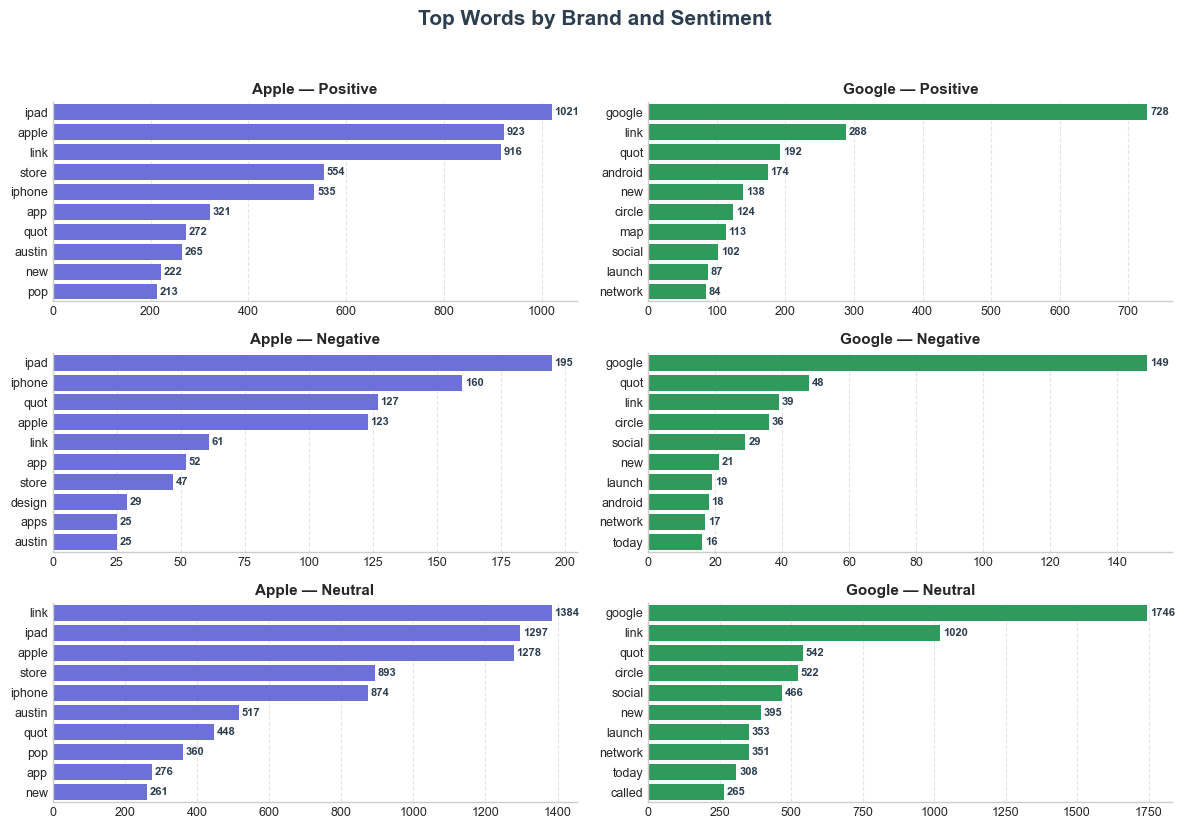

In [23]:
# Extract Top Words per Brand–Sentiment
def get_top_words(df, brand, sentiment, n=10):
    subset = df[(df["product"] == brand) & (df["sentiment"] == sentiment)]
    if subset.empty:
        return pd.DataFrame(columns=["Word", "Count"])
    
    words = " ".join(subset["clean_tweet"]).split()
    filtered = [w for w in words if len(w) > 2 and w.lower() not in STOPWORDS]
    counts = Counter(filtered)

    return pd.DataFrame(counts.most_common(n), columns=["Word", "Count"])

# Collect Data
sentiments = ["positive", "negative", "neutral"]
brands = ["Apple", "Google"]
top_words = {
    f"{b}_{s}": get_top_words(df, b, s)
    for b in brands for s in sentiments
}

# Console Output
for key, tbl in top_words.items():
    print(f"\n=== Top Words for {key.replace('_', ' ')} ===")
    print(tbl.to_string(index=False))

# Visualize
fig, axes = plt.subplots(len(sentiments), len(brands), figsize=(12, 8), sharex=False)
plt.suptitle(
    "Top Words by Brand and Sentiment",
    fontsize=15, fontweight="bold", color="#2C3E50", y=1.03
)

# Palette
palette_map = {"Apple": "#5B5FE8", "Google": "#1FAA59"}

for col, brand in enumerate(brands):
    for row, sent in enumerate(sentiments):
        ax = axes[row, col]
        data = top_words[f"{brand}_{sent}"]

        sns.barplot(
            data=data,
            y="Word", x="Count",
            color=palette_map[brand],
            ax=ax
        )

        ax.set_title(f"{brand} — {sent.capitalize()}", fontsize=11, fontweight="semibold", pad=6)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.tick_params(axis='both', labelsize=9)
        ax.grid(axis="x", linestyle="--", alpha=0.5)
        ax.set_axisbelow(True)

        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)

        # Bar labels
        for container in ax.containers:
            ax.bar_label(
                container, fmt="%d",
                fontsize=8, padding=2, color="#2C3E50", fontweight="semibold"
            )

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:*

- Both brands are heavily tied to SXSW, showing that much of the buzz came from event-driven chatter rather than everyday brand talk.
- For Apple, iPad, iPhone and store dominate across sentiments, signs that discussions centered on products and launches. Even in negative tweets, the same words appear, just in smaller volume, meaning criticism likely revolved around the same topics people praised (e.g product quality, design, or pricing).
- For Google, circle, social, and launch pop up alongside android and google maps, revealing attention around Google+ and related features. Negatives reuse these words too, implying mixed reactions; users talked about the same things whether they liked them or not.

### 7. N-Grams Analysis


=== ALL TWEETS ===

Top Unigrams:
 ngram  count
  link   3708
google   2666
  ipad   2516
 apple   2331
  quot   1629
iphone   1584
 store   1505
   new   1059
austin    916
   app    785

Top Bigrams:
         ngram  count
   apple store    610
social network    451
    new social    412
     pop store    349
 google launch    337
network called    320
 called circle    312
    iphone app    293
    today link    286
     major new    285

Top Trigrams:
                 ngram  count
    new social network    383
 social network called    320
 network called circle    307
      major new social    285
      launch major new    277
   google launch major    264
 circle possibly today    226
called circle possibly    225
   possibly today link    217
       apple pop store    175


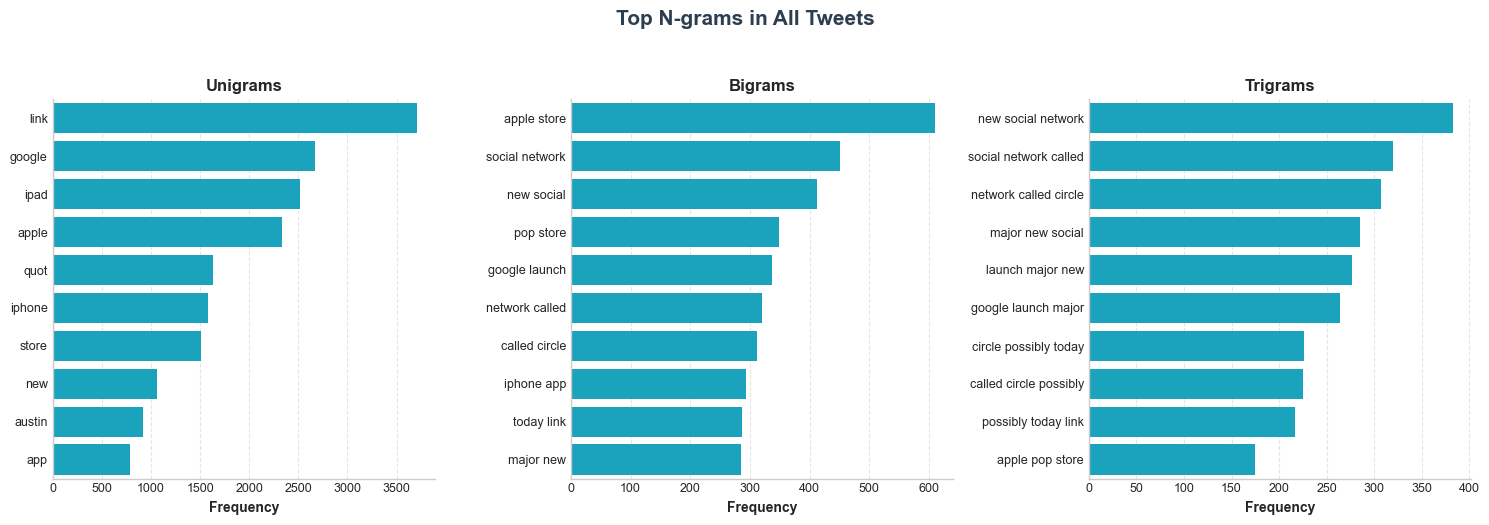


=== APPLE TWEETS ===

Top Unigrams:
 ngram  count
  ipad   2513
  link   2361
 apple   2324
iphone   1569
 store   1494
  quot    847
austin    807
   app    649
   pop    590
   new    505

Top Bigrams:
          ngram  count
    apple store    610
      pop store    349
     iphone app    290
  apple opening    228
      apple pop    214
   store austin    205
     store link    204
temporary store    193
downtown austin    189
 store downtown    172

Top Trigrams:
                   ngram  count
         apple pop store    175
   store downtown austin    163
 apple opening temporary    117
 opening temporary store    114
        apple store link    104
      austin ipad launch    102
        pop store austin     99
        ipad launch link     99
temporary store downtown     98
    downtown austin ipad     94


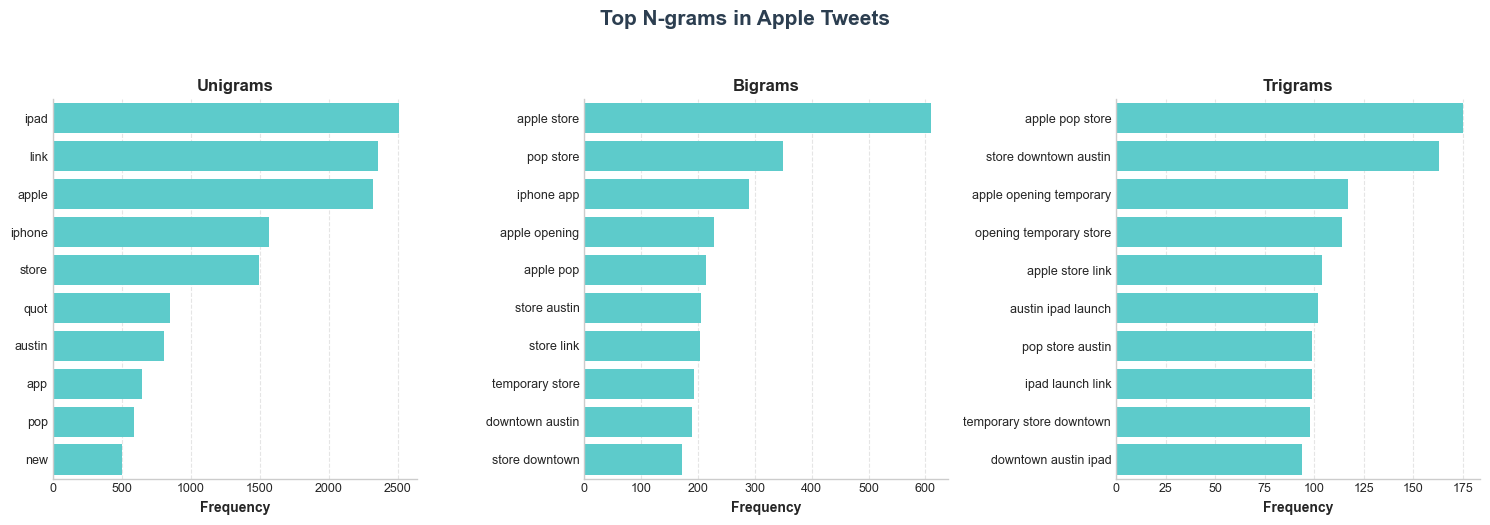


=== GOOGLE TWEETS ===

Top Unigrams:
  ngram  count
 google   2623
   link   1347
   quot    782
 circle    682
 social    597
    new    554
 launch    459
network    452
android    413
  today    387

Top Bigrams:
          ngram  count
 social network    444
     new social    411
  google launch    337
 network called    320
  called circle    312
      major new    285
     today link    281
   launch major    277
 possibly today    233
circle possibly    228

Top Trigrams:
                 ngram  count
    new social network    383
 social network called    320
 network called circle    307
      major new social    285
      launch major new    277
   google launch major    264
 circle possibly today    226
called circle possibly    225
   possibly today link    217
  google marissa mayer     55


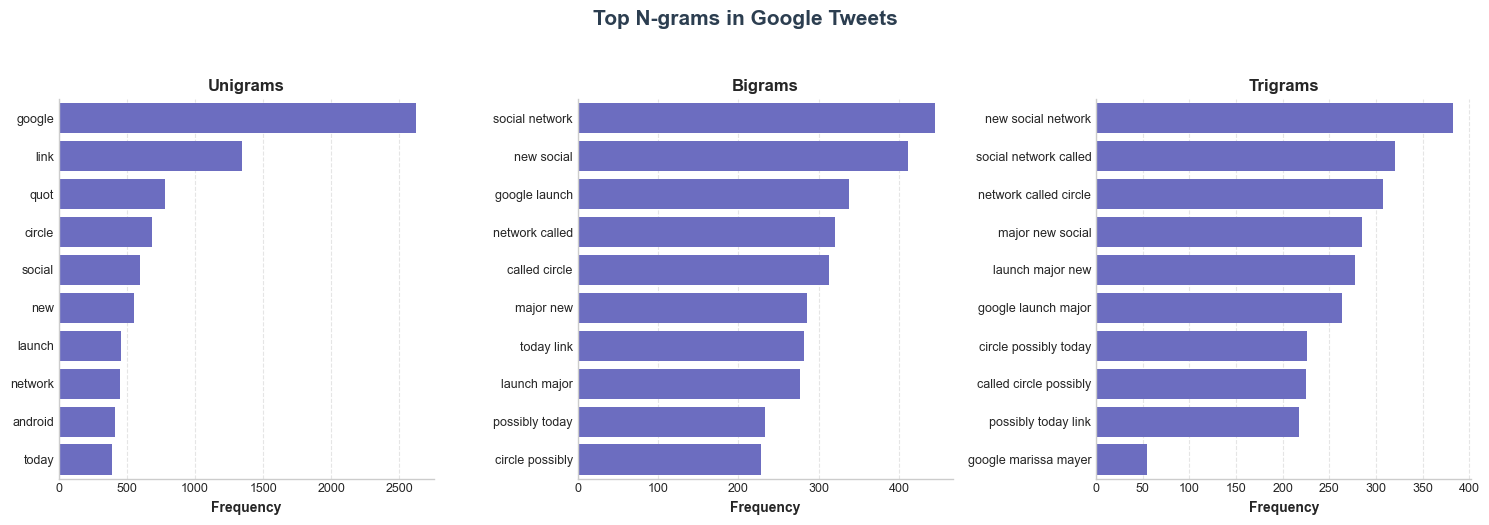


=== NEGATIVE SENTIMENT ===

Top Unigrams:
 ngram  count
  ipad    196
  quot    175
iphone    162
google    151
 apple    123
  link    100
   app     60
 store     47
   new     43
  like     43

Top Bigrams:
          ngram  count
     iphone app     25
    apple store     25
    ipad design     20
design headache     17
  google circle     16
     new social     16
 social network     15
      news apps     13
company america     13
     quot apple     12

Top Trigrams:
                  ngram  count
   ipad design headache     16
     new social network     13
         ipad news apps     12
       major new social     12
  social network called     11
  network called circle     11
fascist company america     11
       launch major new     10
    google launch major      9
      novelty ipad news      9


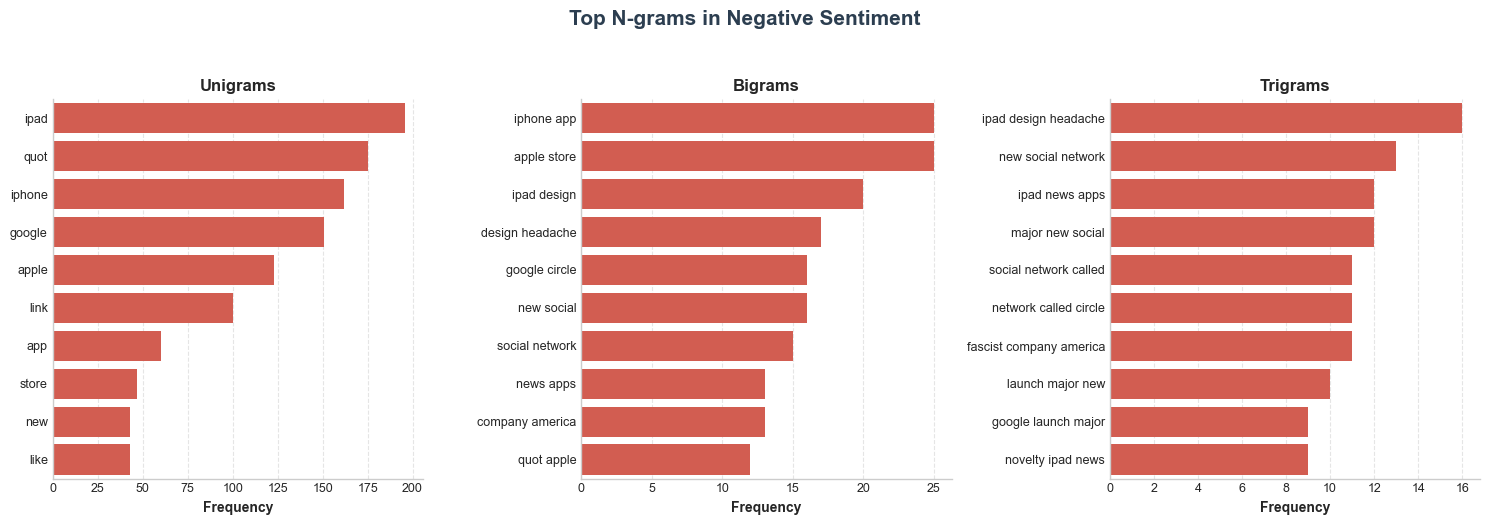


=== POSITIVE SENTIMENT ===

Top Unigrams:
 ngram  count
  link   1204
  ipad   1023
 apple    930
google    738
 store    557
iphone    548
  quot    464
   app    393
   new    360
austin    294

Top Bigrams:
          ngram  count
    apple store    225
     iphone app    136
      pop store    133
     google map     88
      apple pop     87
 social network     87
     new social     77
  apple opening     74
downtown austin     72
       ipad app     71

Top Trigrams:
                  ngram  count
     new social network     74
        apple pop store     67
  store downtown austin     65
  social network called     57
  network called circle     57
       launch major new     54
       major new social     54
    google launch major     50
       ipad launch link     42
opening temporary store     41


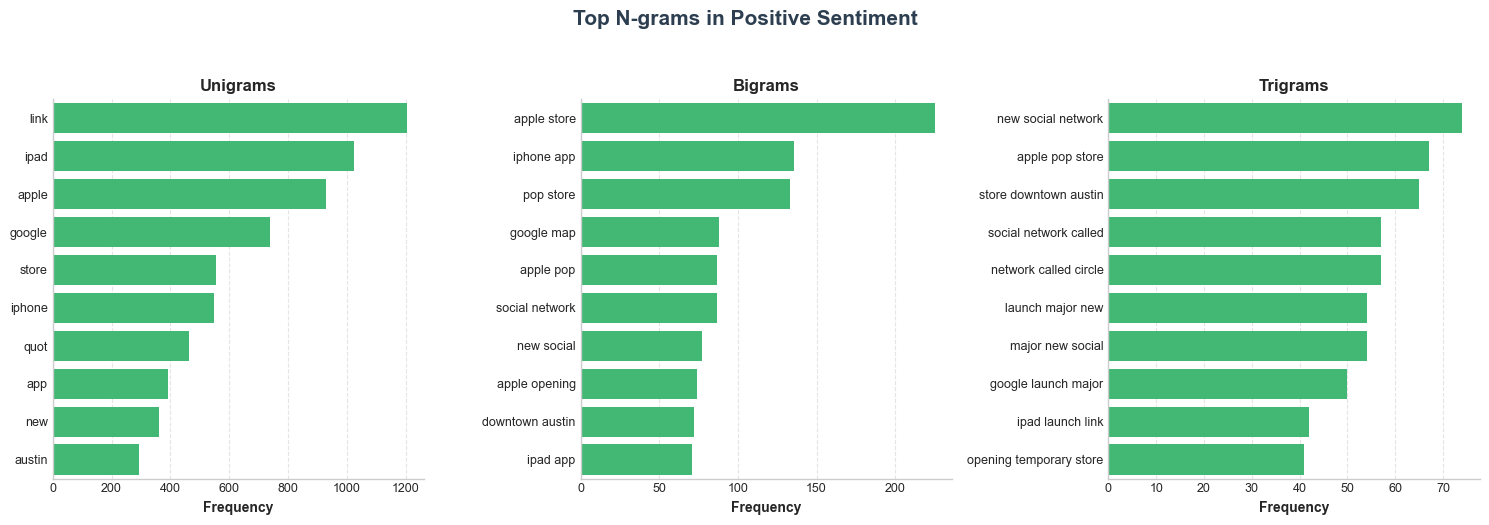


=== NEUTRAL SENTIMENT ===

Top Unigrams:
 ngram  count
  link   2404
google   1777
  ipad   1297
 apple   1278
  quot    990
 store    901
iphone    874
   new    656
austin    596
circle    523

Top Bigrams:
         ngram  count
   apple store    360
social network    349
    new social    319
 google launch    259
network called    252
 called circle    243
    today link    230
     major new    219
  launch major    213
     pop store    211

Top Trigrams:
                 ngram  count
    new social network    296
 social network called    252
 network called circle    239
      major new social    219
      launch major new    213
   google launch major    205
called circle possibly    180
 circle possibly today    180
   possibly today link    173
       apple pop store    104


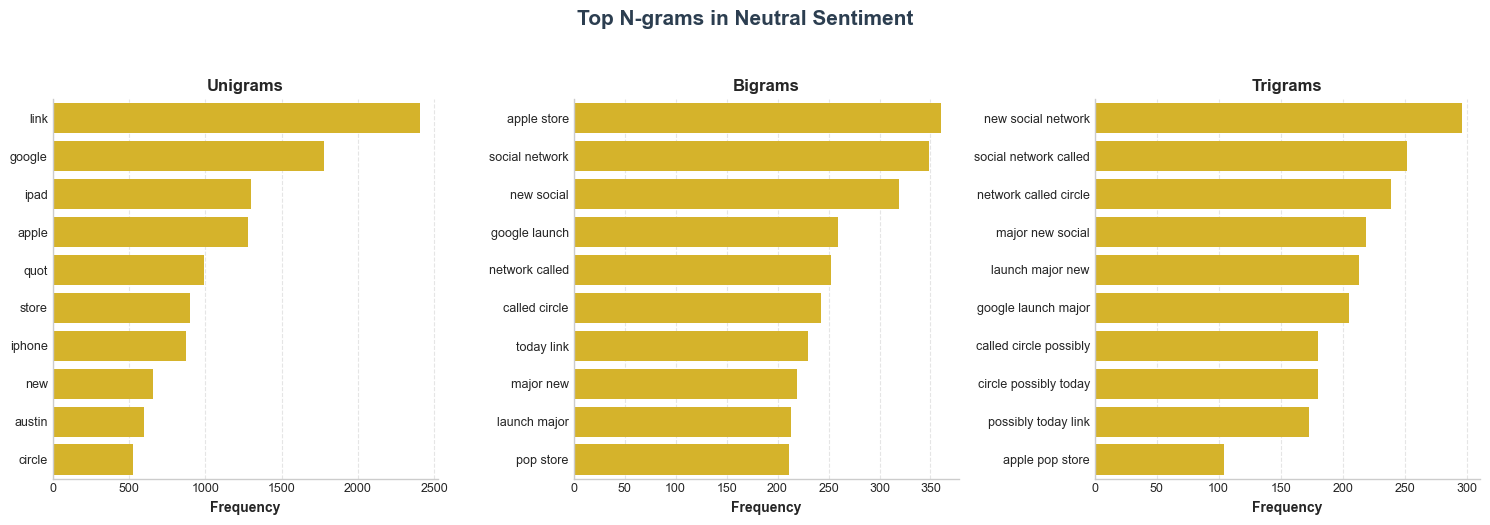

In [24]:
# Function to extract top n-grams
def get_top_ngrams(corpus, n=1, top_k=15):

    '''
        Return a DataFrame of the top n-grams and their frequencies.
    '''

    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return pd.DataFrame(words_freq[:top_k], columns=['ngram', 'count'])


# Function to create subplot grids with printed distributions
def plot_ngram_grid(df, title_prefix, n_list=[1, 2, 3], top_k=10, color="#4ADEDE"):

    '''
        Print the n-gram distributions and plot top unigrams, bigrams, and trigrams in one figure.
    '''

    print(f"\n=== {title_prefix.upper()} ===")
    fig, axes = plt.subplots(1, len(n_list), figsize=(15, 5))
    fig.suptitle(
        f"Top N-grams in {title_prefix}",
        fontsize=15, fontweight="bold", color="#2C3E50", y=1.04
    )

    for i, n in enumerate(n_list):
        df_ng = get_top_ngrams(df, n=n, top_k=top_k)
        
        # Print out the top n-grams before plotting
        print(f"\nTop {['Unigrams', 'Bigrams', 'Trigrams'][i]}:")
        print(df_ng.to_string(index=False))

        sns.barplot(
            data=df_ng, y="ngram", x="count",
            color=color, ax=axes[i]
        )
        axes[i].set_title(
            f"{['Unigrams','Bigrams','Trigrams'][i]}",
            fontsize=12, fontweight="semibold", pad=6
        )
        axes[i].set_xlabel("Frequency", fontsize=10, fontweight="semibold")
        axes[i].set_ylabel("")
        axes[i].tick_params(axis='both', labelsize=9)
        axes[i].grid(axis="x", linestyle="--", alpha=0.5)
        axes[i].set_axisbelow(True)
        for spine in ["top", "right"]:
            axes[i].spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()


# Overall tweet analysis
plot_ngram_grid(df["clean_tweet"], "All Tweets", color="#00B4D8")

# Per brand tweet analysis
brand_colors = {"Apple": "#4ADEDE", "Google": "#5E60CE"}

for brand in df["product"].unique():
    brand_df = df[df["product"] == brand]["clean_tweet"]
    plot_ngram_grid(
        brand_df,
        f"{brand.title()} Tweets",
        color=brand_colors.get(brand, "#4ADEDE")
    )

# Per sentiment analysis
sentiment_colors = {"positive": "#2ECC71", "neutral": "#F1C40F", "negative": "#E74C3C"}

for sentiment in df["sentiment"].unique():
    sent_df = df[df["sentiment"] == sentiment]["clean_tweet"]
    plot_ngram_grid(
        sent_df,
        f"{sentiment.title()} Sentiment",
        color=sentiment_colors.get(sentiment, "#FF9F1C")
    )

*Observation for each:*

1. Overall Tweets:
- General discussions are dominated by the SXSW (South by Southwest) event, with heavy mentions of Apple, Google, iPad, and social network launches.
- Bigrams and trigrams like 'new social network' and 'google launch major' reveal that a major Google product announcement; possibly Google+; was trending during this period.
- Apple also maintains visibility through 'apple store' mentions, indicating store events or launches during SXSW.

2. Apple Tweets:
- Apple’s tweets revolve heavily around SXSW, the iPad, and store-related activities.
- Frequent n-grams such as 'apple store', 'pop store', and 'temporary store downtown' indicate promotional pop-up stores and marketing events in Austin.
- The focus is experiential. Apple’s presence at SXSW was not just about products, but about brand experience and direct consumer engagement.

3. Google Tweets:
- Google discussions also connect strongly to SXSW, but with a clear emphasis on social networking and product launches.
- Phrases like 'new social network', 'network called circle', and 'google launch major' suggest the announcement of Google+, their social media platform at the time.
- Unlike Apple’s tangible store emphasis, Google’s buzz is innovation and tech-driven, centered on digital community building.

4. Negative Sentiment:
- Negative tweets are relatively sparse but mention design flaws, headaches, and frustrations- e.g 'ipad design headache' and 'fascist company america'.
This points to complaints about hardware issues, restrictive company policies, or privacy concerns. Despite the negative tone, the continued presence of SXSW suggests that criticism was part of the ongoing public discourse during event coverage.

5. Positive Sentiment:
- Positive tweets also tie strongly to SXSW but express enthusiasm around Apple’s events, product launches, and new technology.
- N-grams like 'apple store', 'sxsw apple', 'google map', and 'apple pop store' imply customer excitement over in-person experiences and new app launches.
- Mentions of 'new social network' suggest optimism toward Google’s ventures, possibly reflecting curiosity or approval at the time of release.

6. Neutral Sentiment:
- Neutral tweets primarily convey factual or descriptive posts; sharing links, news, and event updates without emotional inflection.
- The same SXSW, 'social network', and 'apple store' terms appear, but with less emotional charge.
- This segment likely includes journalistic, informative, or automated posts reporting ongoing developments rather than expressing opinions.

## TF-IDF ANALYSIS

To better understand what people are talking about in their tweets, we use a technique called TF-IDF (Term Frequency–Inverse Document Frequency). In simple terms, it helps us identify the most important and distinctive words in the text by looking at how often each word appears and how unique it is across all tweets. This way, we can highlight the terms that truly define people’s opinions or focus areas.

In [25]:
# ======= [Build TF-IDF Matrix] ========

def build_tfidf_matrix(df, text_col='clean_tweet', max_features=1000, ngram_range=(1,2)):

    '''
        Vectorizes text using TF-IDF and returns both the matrix and DataFrame.
    '''

    tfidf = TfidfVectorizer(
        stop_words='english',
        max_features=max_features,
        ngram_range=ngram_range
    )

    tfidf_matrix = tfidf.fit_transform(df[text_col].astype(str))
    
    # Convert to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
    
    # Add metadata
    tfidf_df['brand'] = df['product'].values
    tfidf_df['sentiment'] = df['sentiment'].values
    
    # Output
    print("TF-IDF matrix shape:", tfidf_matrix.shape)
    print("\nSample TF-IDF columns:\n", tfidf.get_feature_names_out()[:25])
    print("\nTF-IDF DataFrame:")
    display(tfidf_df.head())
    
    return tfidf_df, tfidf

# Apply
tfidf_df, tfidf = build_tfidf_matrix(df)

TF-IDF matrix shape: (8432, 1000)

Sample TF-IDF columns:
 ['able' 'acc' 'access' 'action' 'action link' 'actually' 'added' 'afford'
 'afford attend' 'ago' 'agree' 'agreed' 'air' 'airport' 'alarm' 'amazing'
 'america' 'analytic' 'android' 'android app' 'android choice'
 'android developer' 'android iphone' 'android link' 'android phone']

TF-IDF DataFrame:


able  acc  access  action  action link  actually  added  afford  \
0   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
1   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
2   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
3   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
4   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   

   afford attend  ago  ...  wow  yeah      year  year link  yelp  yep  yes  \
0            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   
1            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   
2            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   
3            0.0  0.0  ...  0.0   0.0  0.671971        0.0   0.0  0.0  0.0   
4            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   

   yesterday   brand  sentiment  
0        0.0   Apple   negative  
1        0.0   Apple   positive  
2        0.0   Apple   positive  
3        0.0   Apple   negative  
4        0.0  Google   positive  

[5 rows x 1002 columns]

At this stage, we transformed all the tweets into a numerical format that a computer can analyze.

Essentially, each tweet was broken down into individual words or short phrases, and we calculated a score for each one; showing how important or unique it is within the entire collection of tweets.

The result is a TF-IDF matrix with 8,432 rows (representing each tweet) and 1,000 columns (representing the top words or terms). Each number in the matrix shows the importance of a specific word in a particular tweet.

For example, words like “android,” “app,” or “iphone” appear as columns in the matrix. If a tweet talks a lot about “android,” that cell gets a higher TF-IDF score for “android.” This way, the model learns which terms carry meaningful information rather than common filler words.

Finally, we added the brand (Apple or Google) and sentiment (positive or negative) columns to keep track of which tweet each row belongs to and how people feel about it.

### 1. What terms are associated with each brand?

Brand-level TF-IDF matrix shape: (1000, 2)

Top Apple terms:


ipad           0.083701
apple          0.073603
iphone         0.061759
link           0.058842
store          0.051790
apple store    0.031222
austin         0.030693
quot           0.030508
app            0.028696
pop            0.027080
line           0.022668
pop store      0.018426
new            0.017895
iphone app     0.015405
apple pop      0.013393
Name: Apple, dtype: float64


Top Google terms:


google            0.156251
link              0.063617
circle            0.054071
quot              0.052854
social            0.043692
android           0.041997
network           0.034825
social network    0.034296
new               0.034289
launch            0.033077
new social        0.031900
today             0.029654
google launch     0.027489
called            0.026673
google circle     0.026436
Name: Google, dtype: float64

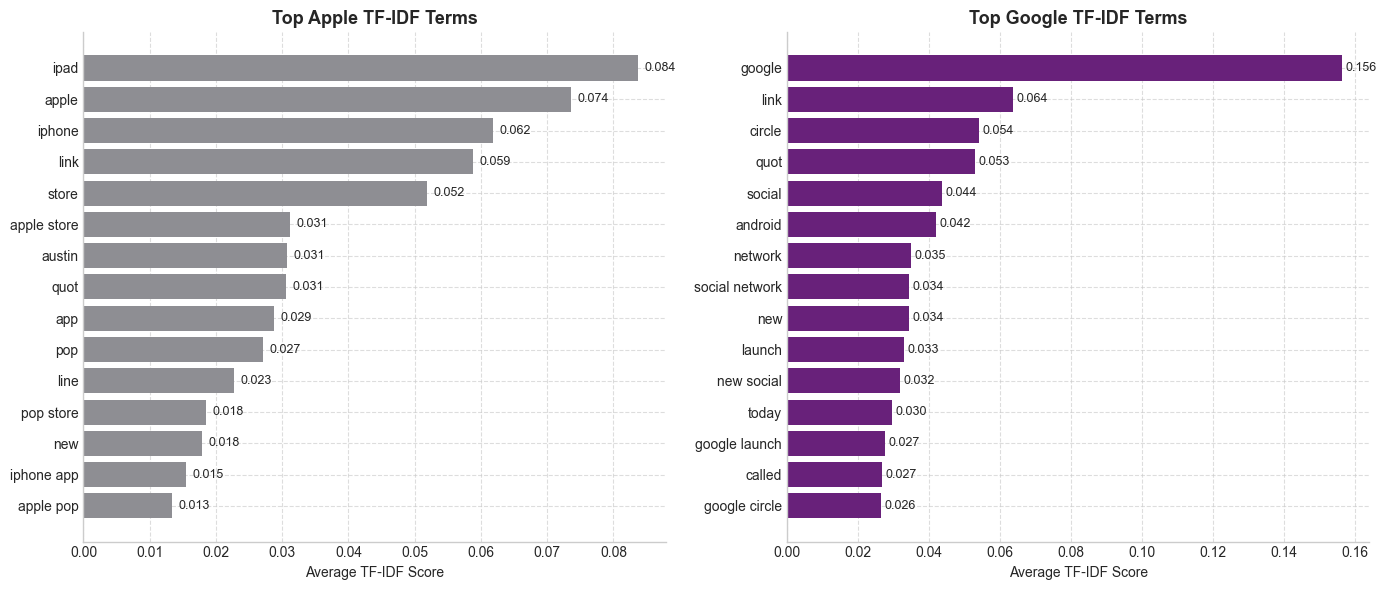

In [26]:
# Create pipeline
def compute_brand_tfidf(tfidf_df):
    '''
        Computes average TF-IDF per brand 
        and visualizes top tokens for each.
        
    '''

    # Keep strictly numeric columns
    numeric_df = tfidf_df.select_dtypes(include=['float', 'int'])
    numeric_df['brand'] = tfidf_df['brand'].values
    
    # Group by brand and average
    brand_tfidf = numeric_df.groupby('brand').mean().T

    # Extract top tokens
    top_apple = brand_tfidf['Apple'].nlargest(15)
    top_google = brand_tfidf['Google'].nlargest(15)

    # Output flow
    print("Brand-level TF-IDF matrix shape:", brand_tfidf.shape)
    print("\nTop Apple terms:")
    display(top_apple)
    print("\nTop Google terms:")
    display(top_google)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

    # Apple Plot
    bars = axes[0].barh(top_apple.index[::-1], top_apple.values[::-1], color="#8E8E93")
    axes[0].set_title("Top Apple TF-IDF Terms", fontsize=13, fontweight='bold')
    axes[0].set_xlabel("Average TF-IDF Score")
    axes[0].grid(True, linestyle="--", alpha=0.65, axis="both")
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    
    # Annotate Apple bars
    for bar in bars:
        width = bar.get_width()
        axes[0].text(width + 0.001, bar.get_y() + bar.get_height()/2,
                     f"{width:.3f}", va='center', fontsize=9)

    # Google Plot
    bars = axes[1].barh(top_google.index[::-1], top_google.values[::-1], color="#68217a")
    axes[1].set_title("Top Google TF-IDF Terms", fontsize=13, fontweight='bold')
    axes[1].set_xlabel("Average TF-IDF Score")
    axes[1].grid(True, linestyle="--", alpha=0.65, axis="both")
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)

    # Annotate Google bars
    for bar in bars:
        width = bar.get_width()
        axes[1].text(width + 0.001, bar.get_y() + bar.get_height()/2,
                     f"{width:.3f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    return brand_tfidf, top_apple, top_google

# Apply
brand_tfidf, top_apple, top_google = compute_brand_tfidf(tfidf_df)

*Insights:*

- Apple conversations center on products and experiences with words like “iPhone,” “iPad,” and “store” highlighting strong emotional engagement and excitement around launches and usability.
- Google discussions focus on innovation and networks with terms like “circle,” “social,” and “launch” revealing a more analytical tone tied to new tech and platform features.

### 2. What are the most common terms for positive and negative sentiments?

Sentiment-level TF-IDF matrix shape: (1000, 3)

Top Positive Terms:


ipad           0.063943
link           0.056557
apple          0.054433
google         0.043063
iphone         0.039482
store          0.035622
app            0.032167
quot           0.029653
new            0.023604
austin         0.021158
apple store    0.020833
android        0.020198
pop            0.018084
great          0.016096
time           0.014962
Name: positive, dtype: float64


Top Negative Terms:


iphone     0.070478
ipad       0.066188
quot       0.062840
google     0.050565
apple      0.041067
link       0.031199
app        0.027990
like       0.023247
people     0.019845
need       0.018423
design     0.017743
apps       0.017191
store      0.017153
android    0.016947
time       0.015440
Name: negative, dtype: float64

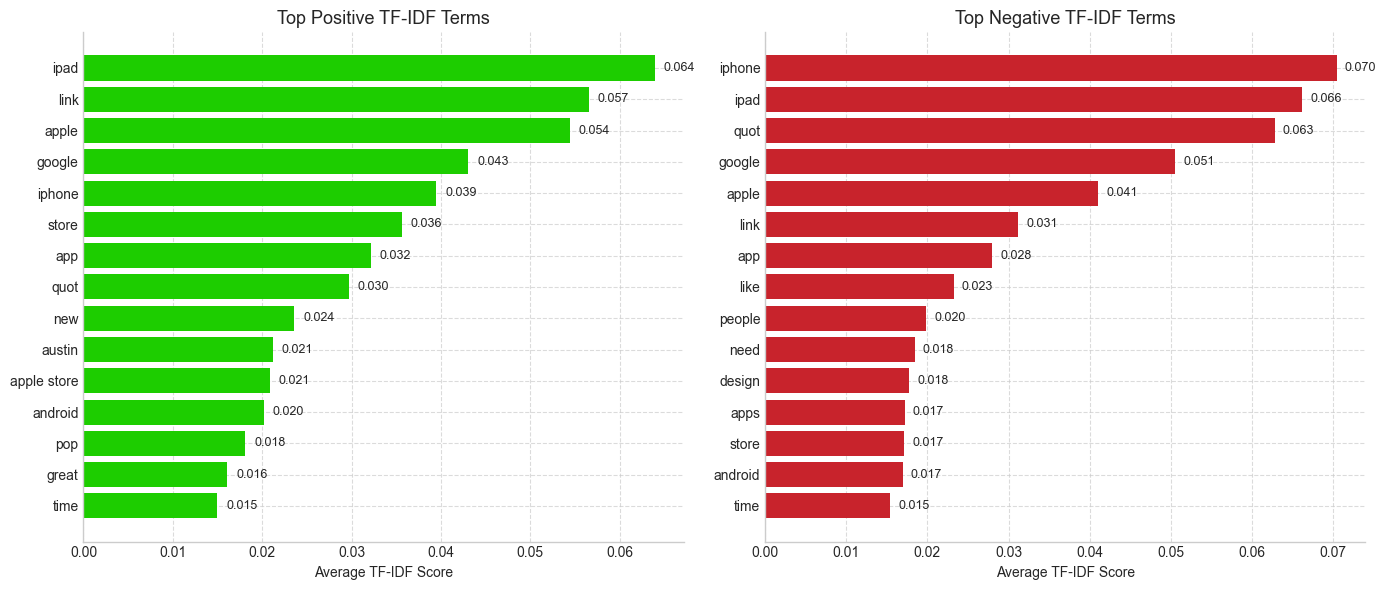

In [27]:
def compute_sentiment_tfidf(tfidf_df):

    '''
    Computes average TF-IDF per sentiment and visualizes top tokens.
    '''

    # Keep numeric columns only
    numeric_df = tfidf_df.select_dtypes(include=['float', 'int'])
    numeric_df['sentiment'] = tfidf_df['sentiment'].values

    # Group by sentiment and compute average TF-IDF
    sentiment_tfidf = numeric_df.groupby('sentiment').mean().T

    # Top terms
    top_positive = sentiment_tfidf['positive'].nlargest(15)
    top_negative = sentiment_tfidf['negative'].nlargest(15)

    # Output flow
    print("Sentiment-level TF-IDF matrix shape:", sentiment_tfidf.shape)
    print("\nTop Positive Terms:")
    display(top_positive)
    print("\nTop Negative Terms:")
    display(top_negative)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

    # Positive
    axes[0].barh(top_positive.index[::-1], top_positive.values[::-1], color="#1dcd00")
    axes[0].set_title("Top Positive TF-IDF Terms", fontsize=13)
    axes[0].set_xlabel("Average TF-IDF Score")

    # Negative
    axes[1].barh(top_negative.index[::-1], top_negative.values[::-1], color="#c8232c")
    axes[1].set_title("Top Negative TF-IDF Terms", fontsize=13)
    axes[1].set_xlabel("Average TF-IDF Score")

    # Style 
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(True, linestyle='--', alpha=0.7)
        for i, v in enumerate(ax.patches):
            ax.text(v.get_width() + 0.001, v.get_y() + v.get_height()/2,
                    f"{v.get_width():.3f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    return sentiment_tfidf, top_positive, top_negative

# Apply
sentiment_tfidf, top_positive, top_negative = compute_sentiment_tfidf(tfidf_df)

*Insights:*

- Positive Sentiment: 
    - Users expressing positivity often focus on Apple’s ecosystem, particularly iPad, iPhone, and App Store. The prominence of “link,” “new,” “great,” and “app” suggests buzz around product launches, new features, and app experiences. Mentions of Google here are likely in a comparative or admiring context.
- Negative Sentiment:
    - Negativity also centers around Apple and Google, but the surrounding terms such as “need,” “people,” “time,” “design,” and “apps”; imply usability frustrations, delays, or dissatisfaction with app or design performance. Frequent “quot” tokens suggest complaint-heavy tweets or quoted criticisms.

### 3. What are the top sentiment terms associated with each brand?

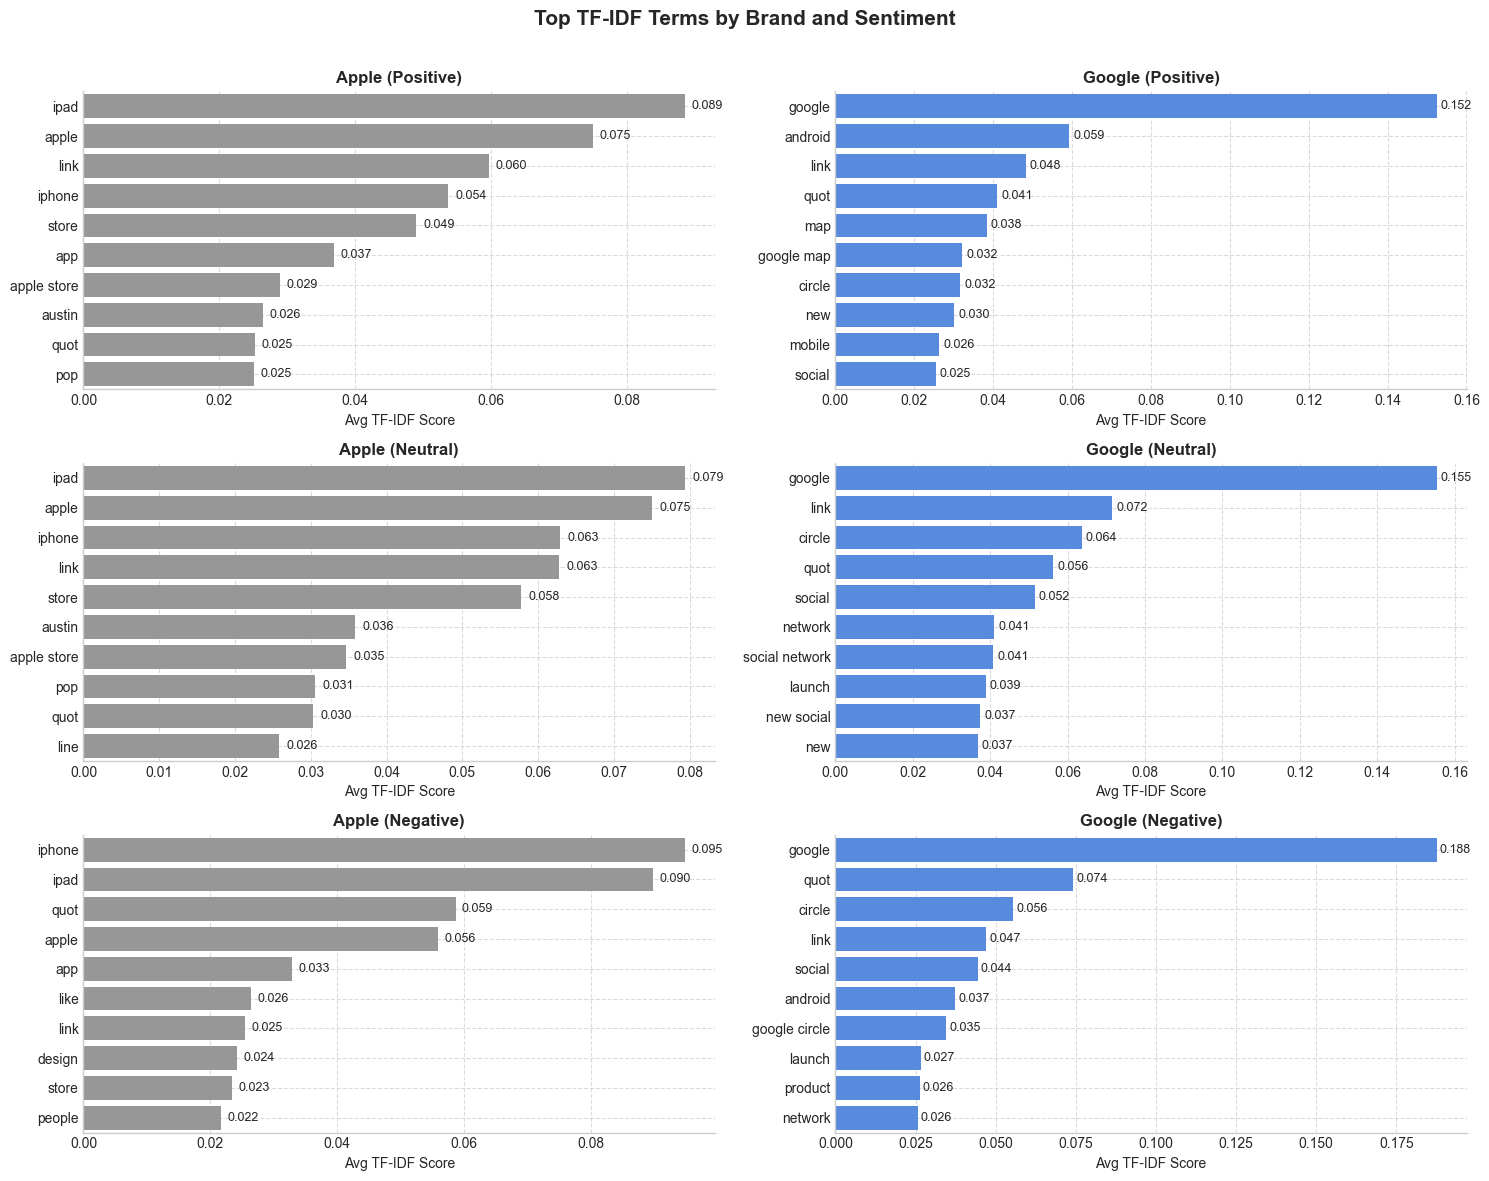

In [28]:
# Create pipeline
def compute_brand_sentiment_tfidf(tfidf_df):

    '''
        Compute and visualize average TF-IDF scores per brand–sentiment combination.
        Displays the top-weighted terms for Apple and Google across sentiments.
    '''

    # Data preparation
    numeric_df = tfidf_df.select_dtypes(include=['float', 'int']).copy()
    numeric_df[['brand', 'sentiment']] = tfidf_df[['brand', 'sentiment']]

    # Group by both brand and sentiment, compute mean TF-IDF
    brand_sent_tfidf = (
        numeric_df.groupby(['brand', 'sentiment'])
        .mean(numeric_only=True)
        .T
    )

    # Visualize
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle("Top TF-IDF Terms by Brand and Sentiment", fontsize=15, fontweight='bold')

    sentiments = ['positive', 'neutral', 'negative']
    brands = ['Apple', 'Google']
    colors = {
        'Apple': '#979797',
        'Google': '#4285f4'
    }

    for i, sentiment in enumerate(sentiments):
        for j, brand in enumerate(brands):
            ax = axes[i, j]
            
            if (brand, sentiment) not in brand_sent_tfidf.columns:
                ax.axis('off')
                continue
            
            # Get top 10 terms
            top_terms = brand_sent_tfidf[(brand, sentiment)].nlargest(10)
            
            # Plot horizontal bars
            sns.barplot(
                x=top_terms.values,
                y=top_terms.index,
                ax=ax,
                color=colors[brand]
            )

            # Style adjustments
            ax.set_title(f"{brand} ({sentiment.capitalize()})", fontsize=12, fontweight='bold')
            ax.set_xlabel("Avg TF-IDF Score", fontsize=10)
            ax.set_ylabel(None)
            ax.grid(True, linestyle='--', alpha=0.7)
            sns.despine(ax=ax, top=True, right=True)

            # Annotate each bar
            for idx, val in enumerate(top_terms.values):
                ax.text(val + 0.001, idx, f"{val:.3f}", va='center', fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

    return brand_sent_tfidf


# Apply and visualize
brand_sent_tfidf = compute_brand_sentiment_tfidf(tfidf_df)

*Insights:*

- Apple chatter is product-driven. People talked about iPhones, iPads, and the Apple Store, showing satisfaction with usability but frustration with design or pricing.
- Google chatter is service-driven; focused on Android, Maps, and social tools like Circles, with praise for innovation but complaints about reliability.

With our feature matrix now established, we transition into the predictive analytics phase. This stage will unfold in two parts: first, we will develop models to predict sentiment (whether positive, neutral or negative), and subsequently, we will extend our framework to brand classification using tweets.

## MODELING

This section outlines the complete end-to-end machine learning pipeline for sentiment and brand classification. The modeling process proceeds through structured stages designed to progressively enhance model robustness and performance.

### WORKFLOW OVERVIEW:

#### 1. VANILLA MODELING:
- We first encode the categorical variables then drop the original non encoded variables.
- Establish benchmark models using the raw TF-IDF feature matrix to assess initial predictive performance.
- Implement and evaluate the following algorithms:
    1. Logistic Regression
    2. Decision Tree
    3. Random Forests
    4. XGBoost

#### 2. DIMENSIONALITY REDUCTION:
- Apply Truncated Singular Value Decomposition (SVD) to reduce feature dimensionality.
- Retain a high percentage of variance while minimizing redundancy and computational overhead.

#### 3. HANDLING CLASS IMBALANCE:
- Detect and mitigate class imbalance issues in sentiment or brand distributions.
- Employ SMOTE (Synthetic Minority Over-sampling Technique) or class weighting to promote balanced learning.

#### 4. HYPERPARAMETER TUNING:
- Fine-tune model parameters using Grid Search or Randomized Search for optimal generalization.
- Select the best-performing configuration based on validation metrics.

#### 5. MODEL EVALUATION AND COMPARISON:
- Compare models using accuracy, precision, recall, F1-score, and ROC-AUC.
- Identify the most effective model for both sentiment and brand prediction tasks.

First we preprocess the data by encoding the categorical features and then dropping them.

In [29]:
# Copy TF-IDF dataframe to avoid modifying original
tfidf_model_df = tfidf_df.copy()

# Initialize encoders
brand_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()

# Encode brand and sentiment
tfidf_model_df['brand_encoded'] = brand_encoder.fit_transform(tfidf_model_df['brand'])
tfidf_model_df['sentiment_encoded'] = sentiment_encoder.fit_transform(tfidf_model_df['sentiment'])

# Drop original categorical columns now that we have encoded versions
tfidf_model_df = tfidf_model_df.drop(columns=['brand', 'sentiment'])

# Check mapping
print("Brand classes:", dict(zip(brand_encoder.classes_, brand_encoder.transform(brand_encoder.classes_))))
print("Sentiment classes:", dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_))))

# Preview dataframe
tfidf_model_df.head()

Brand classes: {'Apple': 0, 'Google': 1}
Sentiment classes: {'negative': 0, 'neutral': 1, 'positive': 2}


able  acc  access  action  action link  actually  added  afford  \
0   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
1   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
2   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
3   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   
4   0.0  0.0     0.0     0.0          0.0       0.0    0.0     0.0   

   afford attend  ago  ...  wow  yeah      year  year link  yelp  yep  yes  \
0            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   
1            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   
2            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   
3            0.0  0.0  ...  0.0   0.0  0.671971        0.0   0.0  0.0  0.0   
4            0.0  0.0  ...  0.0   0.0  0.000000        0.0   0.0  0.0  0.0   

   yesterday  brand_encoded  sentiment_encoded  
0        0.0              0                  0  
1        0.0              0                  2  
2        0.0              0                  2  
3        0.0              0                  0  
4        0.0              1                  2  

[5 rows x 1002 columns]

Split the data after separating the target from the features.

In [30]:
# Features are all numeric TF-IDF columns
X = tfidf_model_df.drop('sentiment_encoded', axis=1)
y = tfidf_model_df['sentiment_encoded']

# Train/test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

We begin with sentiment prediction.

### 1. VANILLA MODELING


Logistic Regression
Training Accuracy: 70.93%
Testing Accuracy:  63.31%

              precision    recall  f1-score   support

           0       0.75      0.03      0.05       113
           1       0.65      0.85      0.74       982
           2       0.57      0.39      0.46       592

    accuracy                           0.63      1687
   macro avg       0.66      0.42      0.42      1687
weighted avg       0.63      0.63      0.60      1687

Confusion Matrix (raw counts):
[[  3  86  24]
 [  1 835 146]
 [  0 362 230]] 



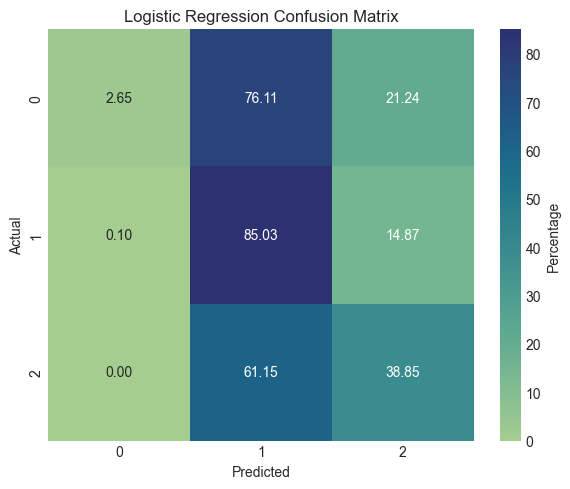

Macro ROC-AUC: 0.720



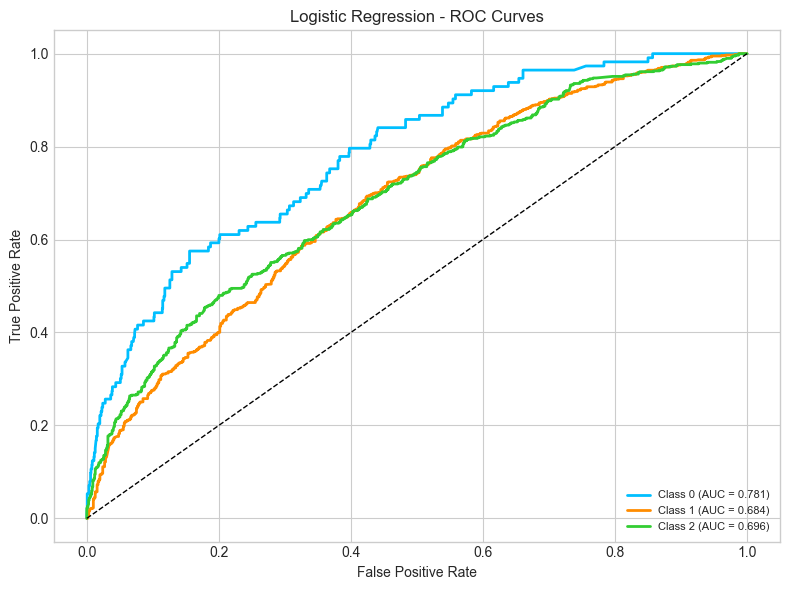


Decision Tree
Training Accuracy: 93.94%
Testing Accuracy:  61.71%

              precision    recall  f1-score   support

           0       0.32      0.30      0.31       113
           1       0.68      0.73      0.70       982
           2       0.55      0.49      0.52       592

    accuracy                           0.62      1687
   macro avg       0.52      0.51      0.51      1687
weighted avg       0.61      0.62      0.61      1687

Confusion Matrix (raw counts):
[[ 34  56  23]
 [ 51 717 214]
 [ 22 280 290]] 



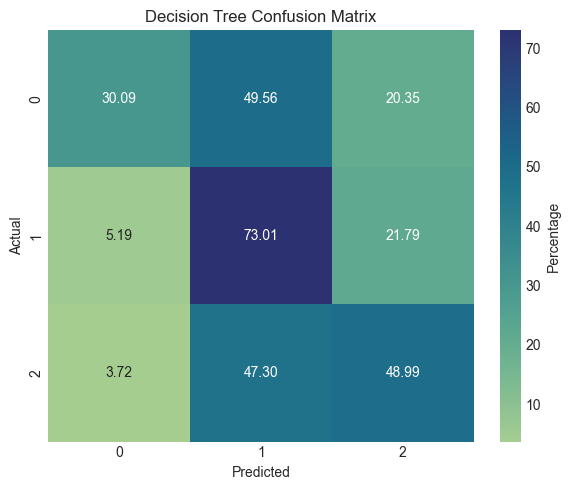

Macro ROC-AUC: 0.630



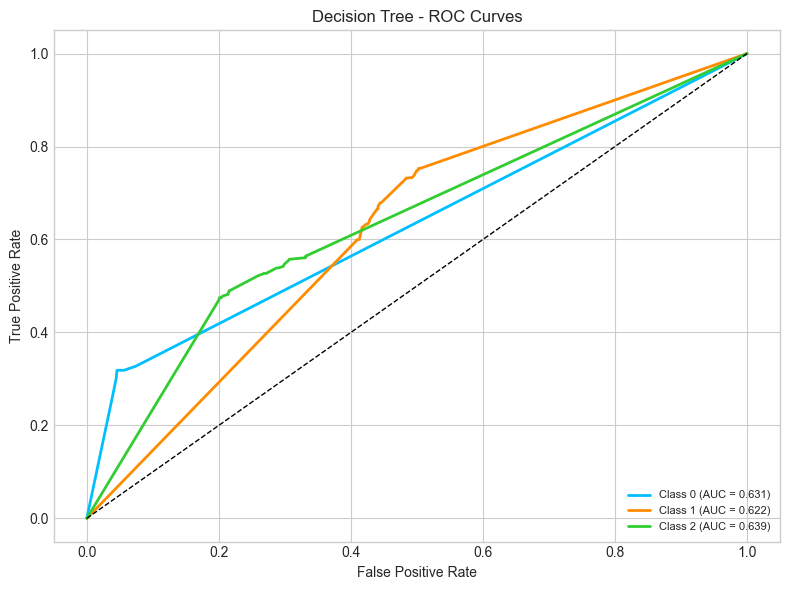


Random Forest
Training Accuracy: 93.94%
Testing Accuracy:  65.62%

              precision    recall  f1-score   support

           0       0.61      0.22      0.32       113
           1       0.68      0.83      0.74       982
           2       0.61      0.46      0.52       592

    accuracy                           0.66      1687
   macro avg       0.63      0.50      0.53      1687
weighted avg       0.65      0.66      0.64      1687

Confusion Matrix (raw counts):
[[ 25  71  17]
 [ 14 811 157]
 [  2 319 271]] 



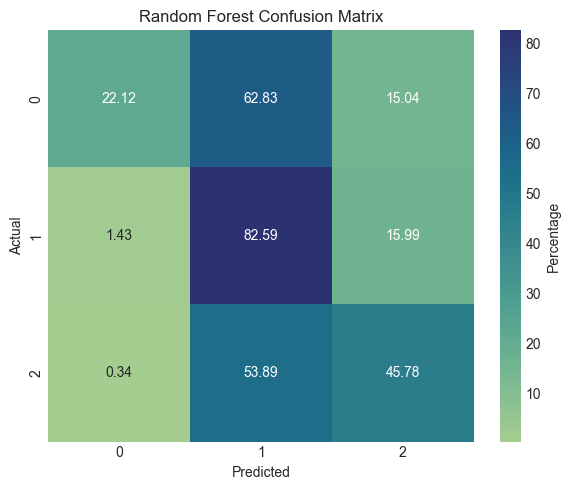

Macro ROC-AUC: 0.730



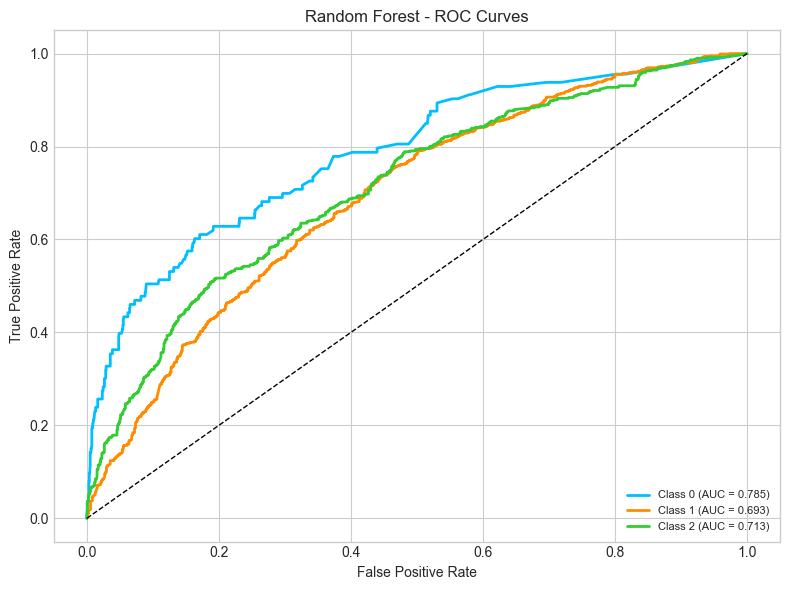


XGBoost
Training Accuracy: 79.76%
Testing Accuracy:  64.32%

              precision    recall  f1-score   support

           0       0.59      0.12      0.19       113
           1       0.66      0.86      0.74       982
           2       0.60      0.39      0.47       592

    accuracy                           0.64      1687
   macro avg       0.62      0.45      0.47      1687
weighted avg       0.63      0.64      0.61      1687

Confusion Matrix (raw counts):
[[ 13  80  20]
 [  8 842 132]
 [  1 361 230]] 



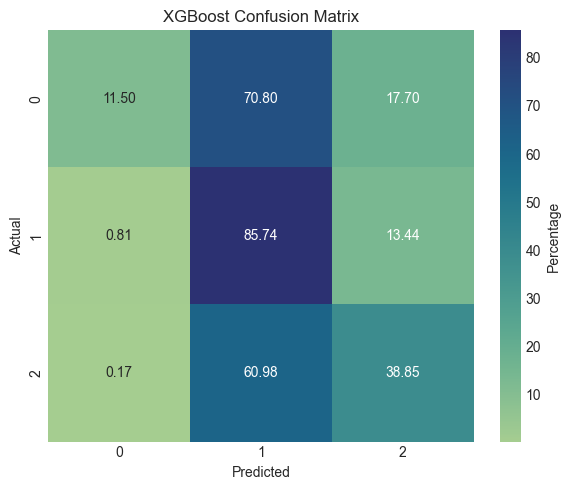

Macro ROC-AUC: 0.729



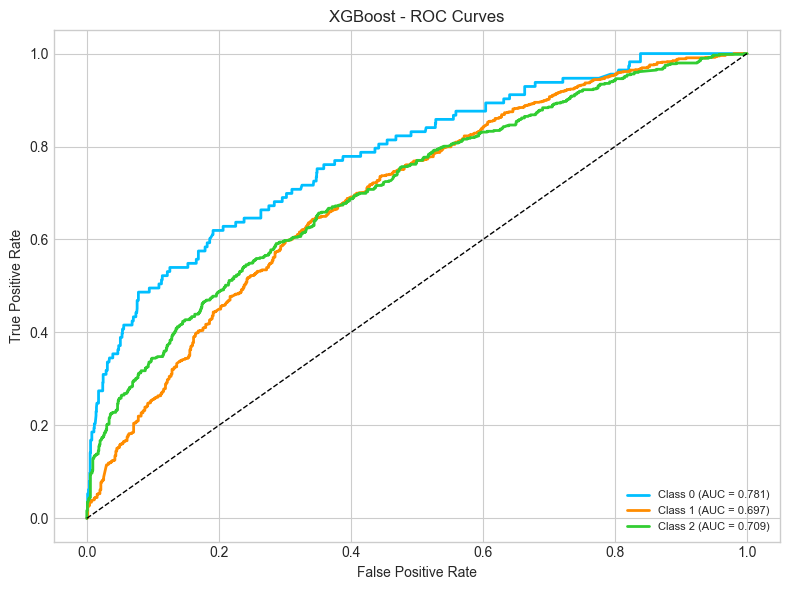

In [31]:
# Helper functions
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap='crest',
        xticklabels=labels, yticklabels=labels,
        cbar_kws={'label': 'Percentage'}
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc_auc(y_test_bin, y_prob, name, num_classes):
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    colors = cycle(['#00BFFF', '#FF8C00', '#32CD32', '#DC143C', '#8A2BE2'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

    plt.plot([0,1], [0,1], 'k--', lw=1)
    plt.title(f"{name} - ROC Curves")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()


# Define Vanilla Models
num_classes = len(np.unique(y_train))

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42, multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                             objective='multi:softprob', num_class=num_classes,
                             n_estimators=300, learning_rate=0.1, random_state=42)
}


# Vanilla Pipeline & Evaluation
results = []

for name, model in models.items():
    print(f"\n{'='*45}\n{name}\n{'='*45}")

    # Define pipeline
    pipeline = Pipeline([
        ('model', model)
    ])

    # Fit pipeline
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Testing Accuracy:  {test_acc*100:.2f}%\n")

    # Classification Report
    report = classification_report(y_test, y_test_pred, output_dict=True)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm_raw = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (raw counts):")
    print(cm_raw, "\n")

    cm_norm = confusion_matrix(y_test, y_test_pred, normalize='true') * 100
    plot_confusion_matrix(cm_norm, labels=np.unique(y_test), title=f"{name} Confusion Matrix")

    # ROC-AUC
    macro_roc_auc = None
    if hasattr(model, "predict_proba"):
        y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))
        y_prob = pipeline.predict_proba(X_test)
        macro_roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
        print(f"Macro ROC-AUC: {macro_roc_auc:.3f}\n")
        plot_roc_auc(y_test_bin, y_prob, name, num_classes)
    else:
        print("ROC-AUC not available for this model.\n")

    # Store metrics
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Macro F1': report['macro avg']['f1-score'],
        'Weighted F1': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'ROC-AUC (macro)': macro_roc_auc
    })


# Summary Table
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)

numeric_cols = results_df.select_dtypes(include='number').columns
style_dict = {col: "{:.3f}" for col in numeric_cols}

results_df_styled = (
    results_df.style
    .background_gradient(cmap='Blues', subset=numeric_cols)
    .format(style_dict)
    .set_caption("Vanilla Pipeline Model Performance")
)

display(results_df_styled)

### 2. DIMENSIONALITY REDUCTION

In high-dimensional text feature spaces such as TF-IDF, models can become computationally expensive, prone to overfitting, and sensitive to noise. Dimensionality reduction techniques help to compress the feature space while retaining the majority of the meaningful variance.

For this analysis, we employ Truncated Singular Value Decomposition (SVD), a variant of Principal Component Analysis suitable for sparse matrices like TF-IDF. This transformation reduces the number of features, improves computational efficiency, and often enhances model generalization.

The reduced feature set will be used in subsequent modeling steps, including handling class imbalance and hyperparameter optimization, ensuring that our sentiment and brand classifiers are both accurate and efficient.

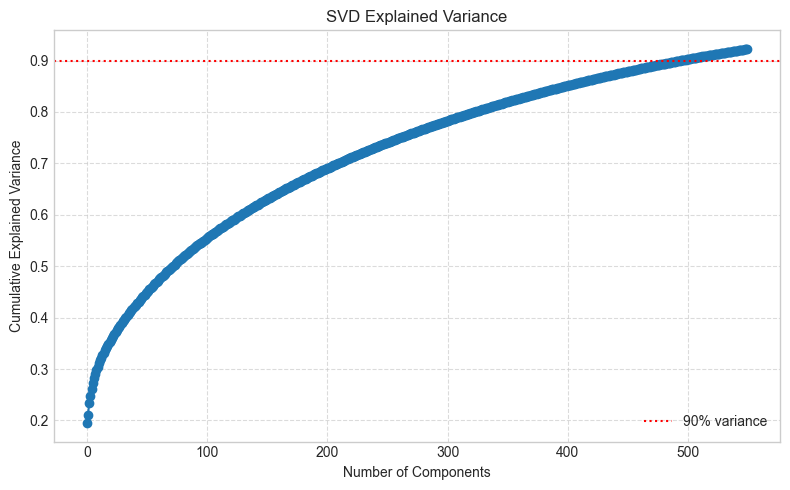

Original TF-IDF shape: (6745, 1001)
Reduced SVD shape: (6745, 550)


In [32]:
# Fit SVD on original training features
svd = TruncatedSVD(n_components=550, random_state=42)  # 550 componente to explain 90% variance
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Optional: check cumulative explained variance
explained_variance = np.cumsum(svd.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle=':', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD Explained Variance')
plt.grid(alpha=0.7, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

print("Original TF-IDF shape:", X_train.shape)
print("Reduced SVD shape:", X_train_svd.shape)


Logistic Regression
Training Accuracy: 69.86%
Testing Accuracy:  63.84%

              precision    recall  f1-score   support

           0       0.75      0.03      0.05       113
           1       0.65      0.87      0.74       982
           2       0.60      0.38      0.46       592

    accuracy                           0.64      1687
   macro avg       0.67      0.42      0.42      1687
weighted avg       0.64      0.64      0.60      1687

Confusion Matrix (raw counts):
[[  3  90  20]
 [  1 850 131]
 [  0 368 224]] 



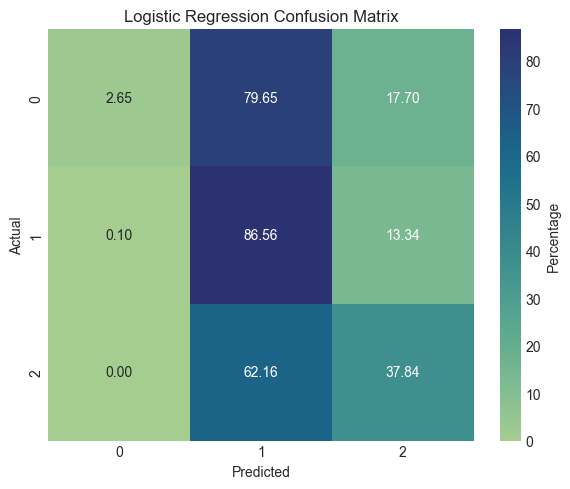

Macro ROC-AUC: 0.714



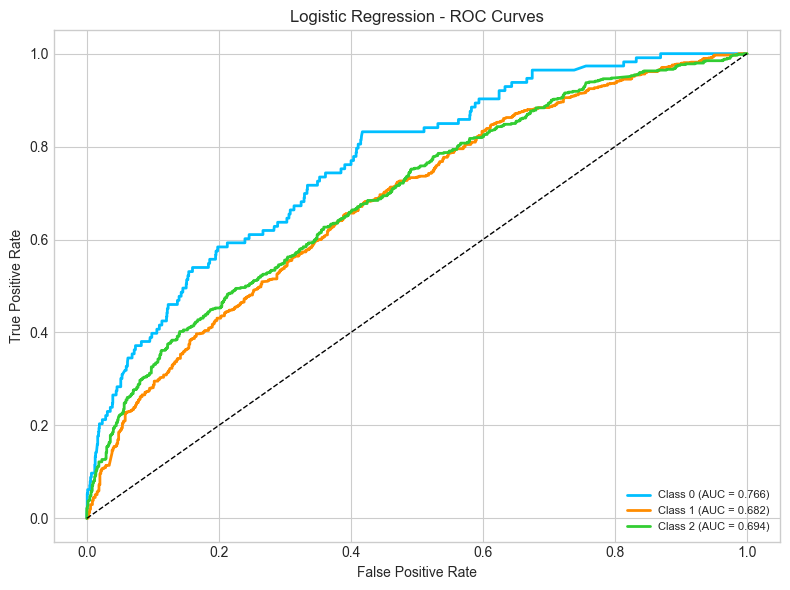


Decision Tree
Training Accuracy: 93.94%
Testing Accuracy:  57.74%

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       113
           1       0.66      0.68      0.67       982
           2       0.49      0.46      0.47       592

    accuracy                           0.58      1687
   macro avg       0.48      0.47      0.47      1687
weighted avg       0.57      0.58      0.58      1687

Confusion Matrix (raw counts):
[[ 32  55  26]
 [ 60 672 250]
 [ 24 298 270]] 



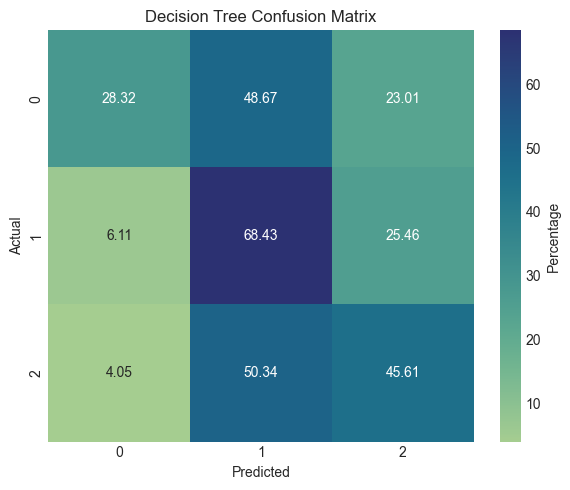

Macro ROC-AUC: 0.603



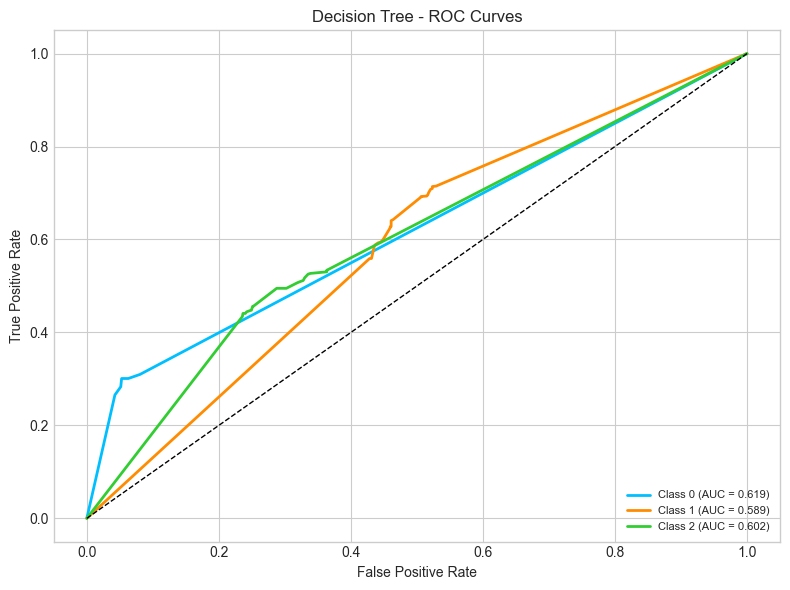


Random Forest
Training Accuracy: 93.94%
Testing Accuracy:  63.90%

              precision    recall  f1-score   support

           0       0.57      0.18      0.27       113
           1       0.64      0.87      0.74       982
           2       0.62      0.34      0.44       592

    accuracy                           0.64      1687
   macro avg       0.61      0.46      0.48      1687
weighted avg       0.63      0.64      0.60      1687

Confusion Matrix (raw counts):
[[ 20  85   8]
 [ 12 857 113]
 [  3 388 201]] 



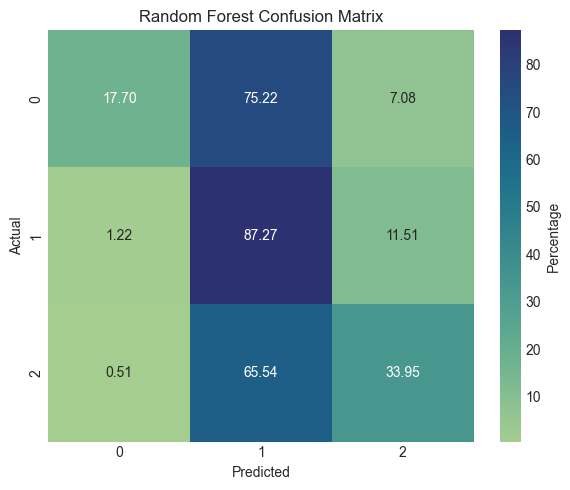

Macro ROC-AUC: 0.703



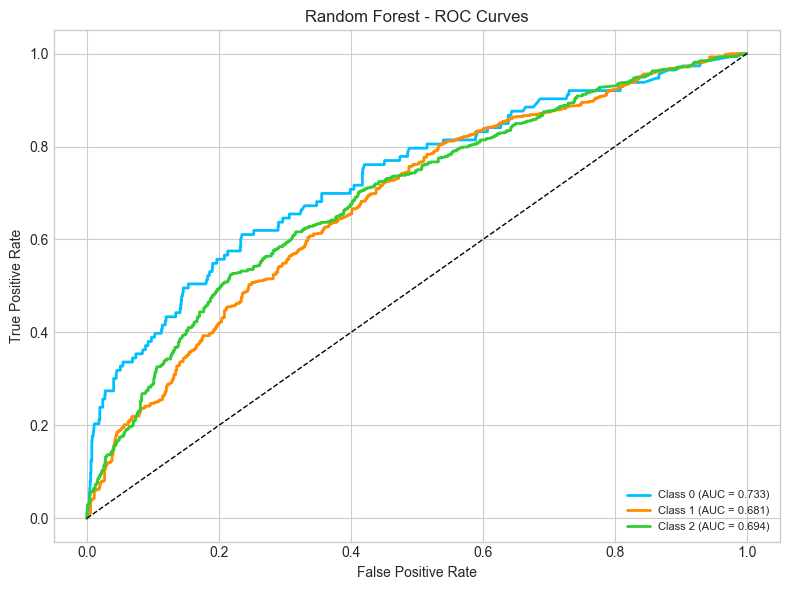


XGBoost
Training Accuracy: 93.94%
Testing Accuracy:  64.02%

              precision    recall  f1-score   support

           0       0.55      0.19      0.29       113
           1       0.67      0.81      0.73       982
           2       0.58      0.45      0.50       592

    accuracy                           0.64      1687
   macro avg       0.60      0.48      0.51      1687
weighted avg       0.63      0.64      0.62      1687

Confusion Matrix (raw counts):
[[ 22  74  17]
 [ 14 794 174]
 [  4 324 264]] 



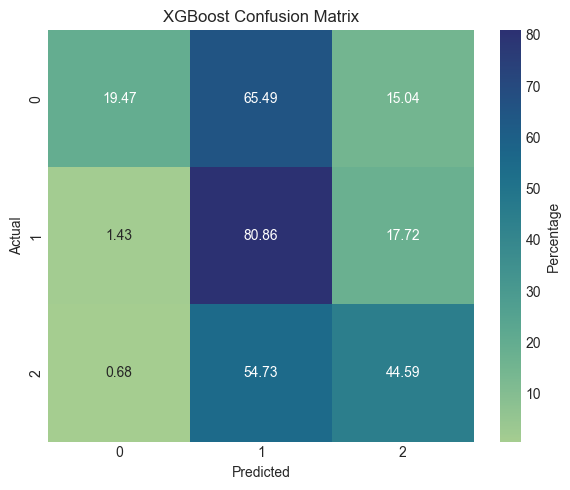

Macro ROC-AUC: 0.716



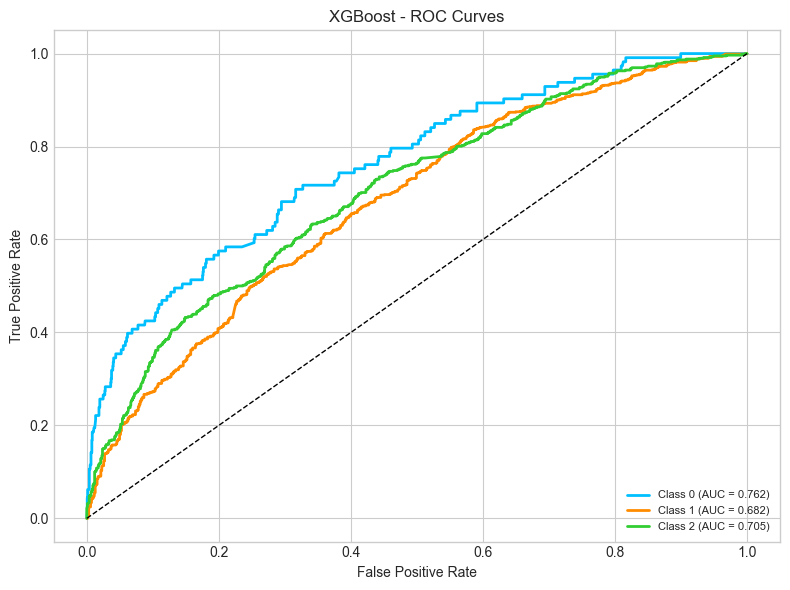

In [33]:
# Helper functions
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap='crest',
        xticklabels=labels, yticklabels=labels,
        cbar_kws={'label': 'Percentage'}
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc_auc(y_test_bin, y_prob, name, num_classes):
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    colors = cycle(['#00BFFF', '#FF8C00', '#32CD32', '#DC143C', '#8A2BE2'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

    plt.plot([0,1], [0,1], 'k--', lw=1)
    plt.title(f"{name} - ROC Curves")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()


# Define Models
num_classes = len(np.unique(y_train))

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42, multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                             objective='multi:softprob', num_class=num_classes,
                             n_estimators=300, learning_rate=0.1, random_state=42)
}


# Vanilla Pipeline and  Evaluation
results = []

for name, model in models.items():
    print(f"\n{'='*45}\n{name}\n{'='*45}")

    # Define pipeline: SVD and Model
    pipeline = Pipeline([
        ('svd', TruncatedSVD(n_components=550, random_state=42)),
        ('model', model)
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Testing Accuracy:  {test_acc*100:.2f}%\n")

    # Classification Report
    report = classification_report(y_test, y_test_pred, output_dict=True)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm_raw = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (raw counts):")
    print(cm_raw, "\n")

    cm_norm = confusion_matrix(y_test, y_test_pred, normalize='true') * 100
    plot_confusion_matrix(cm_norm, labels=np.unique(y_test), title=f"{name} Confusion Matrix")

    # ROC-AUC
    macro_roc_auc = None
    if hasattr(model, "predict_proba"):
        y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))
        y_prob = pipeline.predict_proba(X_test)
        macro_roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
        print(f"Macro ROC-AUC: {macro_roc_auc:.3f}\n")
        plot_roc_auc(y_test_bin, y_prob, name, num_classes)
    else:
        print("ROC-AUC not available for this model.\n")

    # Store metrics
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Macro F1': report['macro avg']['f1-score'],
        'Weighted F1': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'ROC-AUC (macro)': macro_roc_auc
    })


# Summary Table
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)

numeric_cols = results_df.select_dtypes(include='number').columns
style_dict = {col: "{:.3f}" for col in numeric_cols}

results_df_styled = (
    results_df.style
    .background_gradient(cmap='Blues', subset=numeric_cols)
    .format(style_dict)
    .set_caption("Vanilla Pipeline Model Performance With SVD")
)

display(results_df_styled)

### 3. HANDLING CLASS IMBALANCE USING SMOTE

In [34]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_svd, y_train)

# Preview
print("Original training distribution:", Counter(y_train))
print("Resampled training distribution:", Counter(y_train_res))

  File "C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Original training distribution: Counter({1: 3924, 2: 2367, 0: 454})
Resampled training distribution: Counter({1: 3924, 2: 3924, 0: 3924})


### RETRAIN ALL MODELS ON DIMENSIONALITY REDUCED DATA WITH CLASS IMBALANCE GANDLING USING SMOTE


Logistic Regression
Training Accuracy (SMOTE): 71.93%
Testing Accuracy:          54.77%

              precision    recall  f1-score   support

           0       0.18      0.50      0.27       113
           1       0.71      0.56      0.63       982
           2       0.53      0.54      0.53       592

    accuracy                           0.55      1687
   macro avg       0.47      0.53      0.47      1687
weighted avg       0.61      0.55      0.57      1687

Confusion Matrix (raw counts):
[[ 56  38  19]
 [168 551 263]
 [ 83 192 317]] 



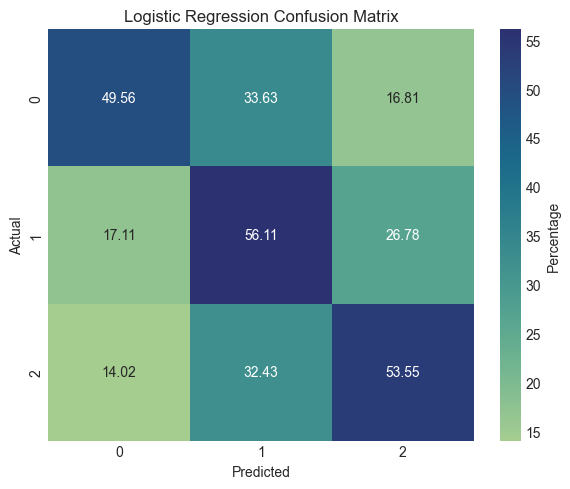

Macro ROC-AUC: 0.711



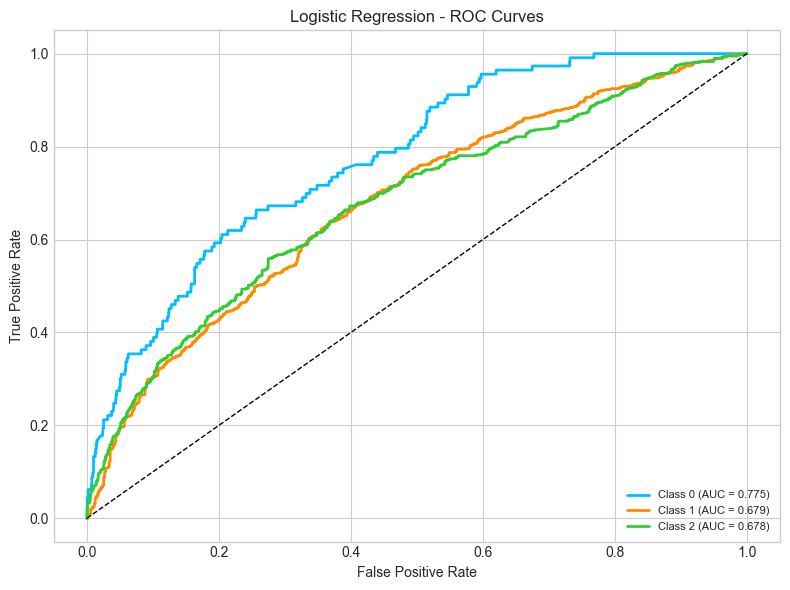


Decision Tree
Training Accuracy (SMOTE): 96.10%
Testing Accuracy:          53.53%

              precision    recall  f1-score   support

           0       0.19      0.34      0.25       113
           1       0.66      0.61      0.63       982
           2       0.46      0.45      0.45       592

    accuracy                           0.54      1687
   macro avg       0.44      0.46      0.44      1687
weighted avg       0.56      0.54      0.54      1687

Confusion Matrix (raw counts):
[[ 38  52  23]
 [ 90 601 291]
 [ 69 259 264]] 



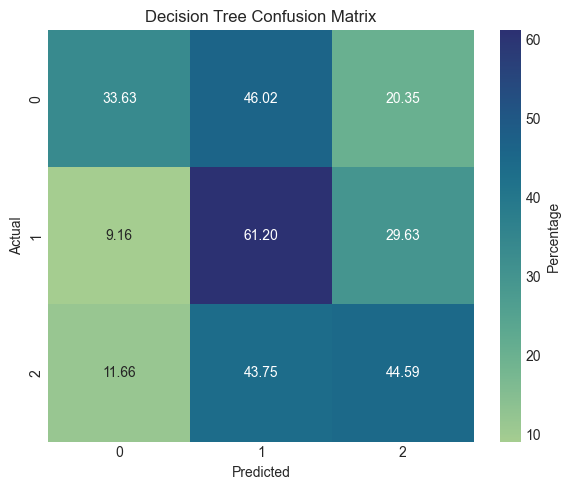

Macro ROC-AUC: 0.594



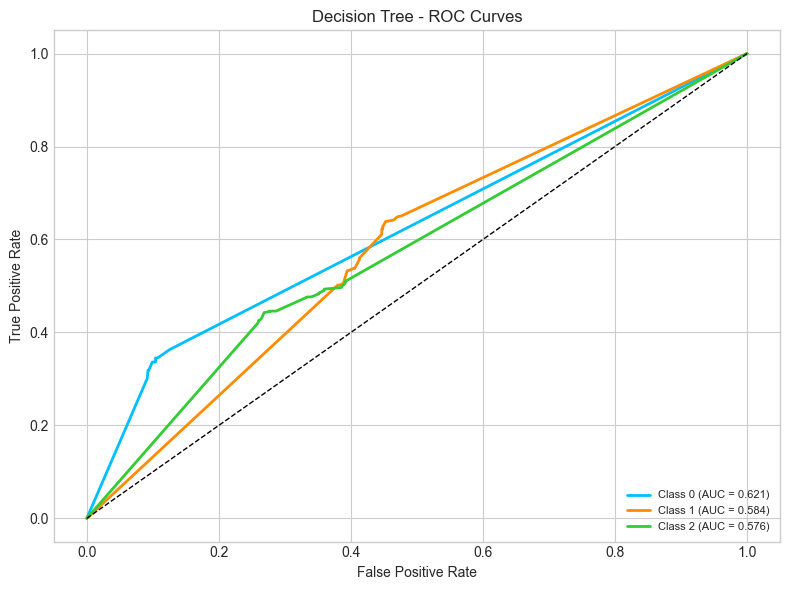


Random Forest
Training Accuracy (SMOTE): 96.10%
Testing Accuracy:          61.77%

              precision    recall  f1-score   support

           0       0.47      0.29      0.36       113
           1       0.67      0.73      0.70       982
           2       0.53      0.50      0.51       592

    accuracy                           0.62      1687
   macro avg       0.56      0.51      0.52      1687
weighted avg       0.61      0.62      0.61      1687

Confusion Matrix (raw counts):
[[ 33  60  20]
 [ 25 713 244]
 [ 12 284 296]] 



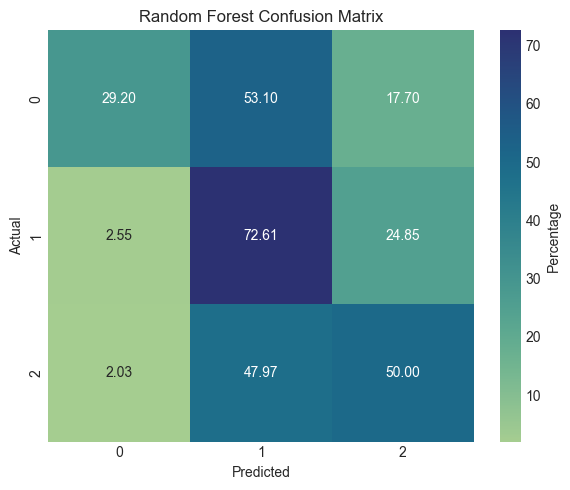

Macro ROC-AUC: 0.706



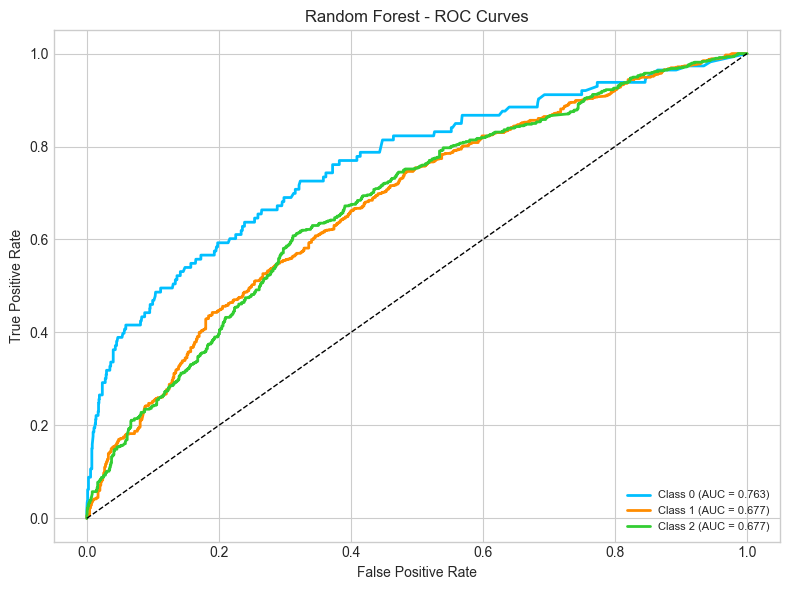


XGBoost
Training Accuracy (SMOTE): 96.10%
Testing Accuracy:          61.23%

              precision    recall  f1-score   support

           0       0.37      0.30      0.33       113
           1       0.68      0.71      0.69       982
           2       0.54      0.52      0.52       592

    accuracy                           0.61      1687
   macro avg       0.53      0.51      0.52      1687
weighted avg       0.61      0.61      0.61      1687

Confusion Matrix (raw counts):
[[ 34  59  20]
 [ 43 694 245]
 [ 14 273 305]] 



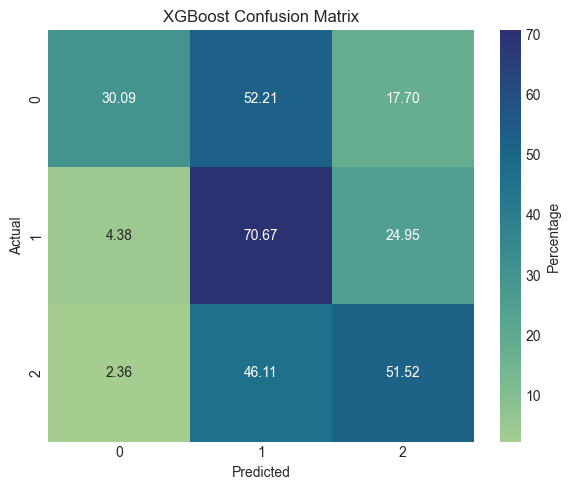

Macro ROC-AUC: 0.717



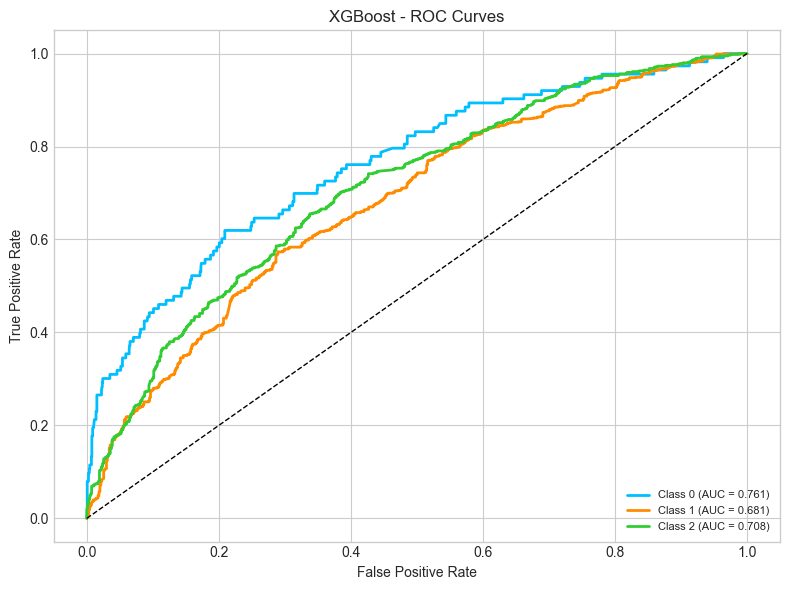

In [35]:
# Model Setup
num_classes = len(np.unique(y_train))

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000, solver='lbfgs', random_state=42, multi_class='ovr'
    ),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softprob',
        num_class=num_classes,
        random_state=42,
        n_estimators=300,
        learning_rate=0.1
    )
}


# Helper Functions
def plot_confusion_matrix(cm, labels, title):

    '''
        Plot confusion matrix for each model
    '''

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap='crest',
        xticklabels=labels, yticklabels=labels,
        cbar_kws={'label': 'Percentage'}
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


def plot_roc_auc(y_test_bin, y_prob, name, num_classes):

    '''
        Plot ROC-AUC curve for each model
    '''

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    colors = cycle(['#00BFFF', '#FF8C00', '#32CD32', '#DC143C', '#8A2BE2'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

    plt.plot([0,1], [0,1], 'k--', lw=1)
    plt.title(f"{name} - ROC Curves")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()


# Training and Evaluation
# Binarize y_test for ROC-AUC
y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))

results = []

for name, model in models.items():
    print(f"\n{'='*45}\n{name}\n{'='*45}")

    # Train
    model.fit(X_train_res, y_train_res)

    # Predictions
    y_train_pred = model.predict(X_train_res)  # on SMOTE train
    y_test_pred = model.predict(X_test_svd)    # on original test

    # Accuracy
    train_acc = accuracy_score(y_train_res, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy (SMOTE): {train_acc*100:.2f}%")
    print(f"Testing Accuracy:          {test_acc*100:.2f}%\n")

    # Classification Report
    report = classification_report(y_test, y_test_pred, output_dict=True)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm_raw = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (raw counts):")
    print(cm_raw, "\n")

    cm_norm = confusion_matrix(y_test, y_test_pred, normalize='true') * 100
    plot_confusion_matrix(cm_norm, labels=np.unique(y_test), title=f"{name} Confusion Matrix")

    # ROC-AUC
    macro_roc_auc = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_svd)
        macro_roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
        print(f"Macro ROC-AUC: {macro_roc_auc:.3f}\n")
        plot_roc_auc(y_test_bin, y_prob, name, num_classes)
    else:
        print("ROC-AUC not available for this model.\n")

    # Store metrics
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Macro F1': report['macro avg']['f1-score'],
        'Weighted F1': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'ROC-AUC (macro)': macro_roc_auc
    })


# Summary Table
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)

numeric_cols = results_df.select_dtypes(include='number').columns
style_dict = {col: "{:.3f}" for col in numeric_cols}

results_df_styled = (
    results_df.style
    .background_gradient(cmap='Blues', subset=numeric_cols)
    .format(style_dict)
    .set_caption("Model Performance Summary Using SMOTE")
)

display(results_df_styled)

### HANDLING CLASS IMBALANCE USING CLASS WEIGHTS AND RETRAIN ALL MODELS

In [36]:
# Compute Class Weights
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: 4.952276064610866, 1: 0.5729697587495752, 2: 0.9498662160259118}



Logistic Regression
Training Accuracy: 63.69%
Testing Accuracy:  54.24%

              precision    recall  f1-score   support

           0       0.17      0.51      0.26       113
           1       0.71      0.57      0.63       982
           2       0.53      0.51      0.52       592

    accuracy                           0.54      1687
   macro avg       0.47      0.53      0.47      1687
weighted avg       0.61      0.54      0.57      1687

Confusion Matrix (raw counts):
[[ 58  39  16]
 [177 556 249]
 [102 189 301]] 



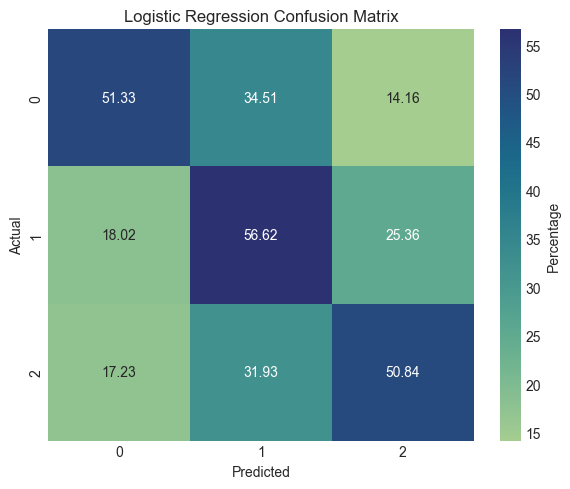

Macro ROC-AUC: 0.712



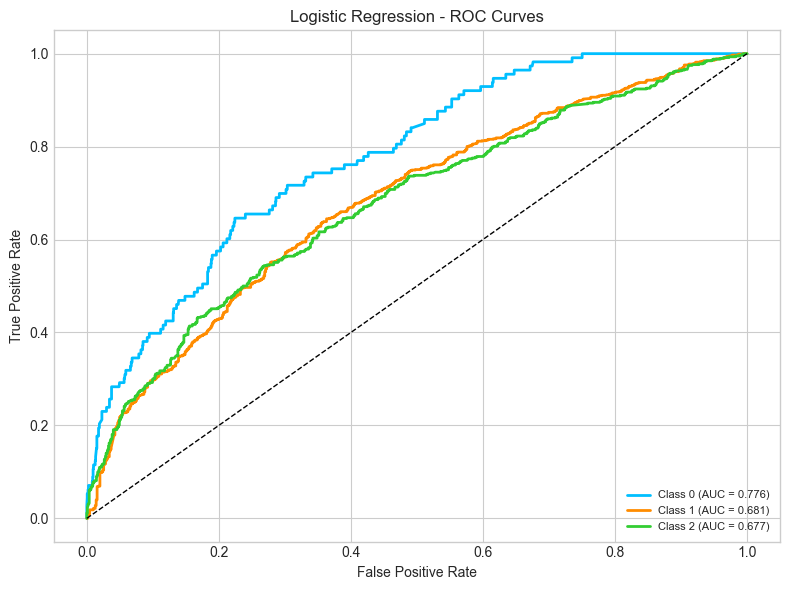


Decision Tree
Training Accuracy: 93.30%
Testing Accuracy:  55.66%

              precision    recall  f1-score   support

           0       0.23      0.30      0.26       113
           1       0.66      0.64      0.65       982
           2       0.47      0.47      0.47       592

    accuracy                           0.56      1687
   macro avg       0.45      0.47      0.46      1687
weighted avg       0.57      0.56      0.56      1687

Confusion Matrix (raw counts):
[[ 34  48  31]
 [ 68 629 285]
 [ 44 272 276]] 



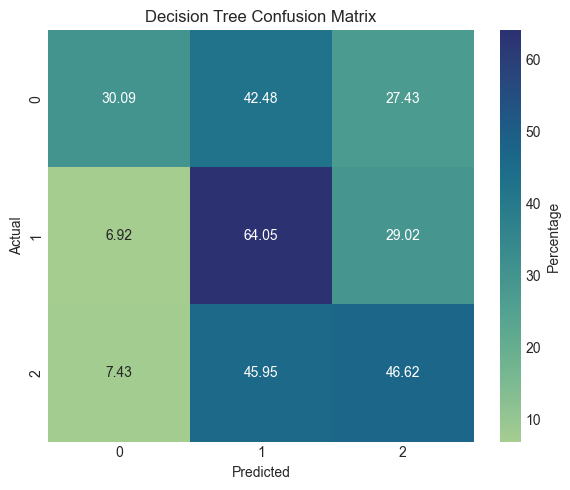

Macro ROC-AUC: 0.603



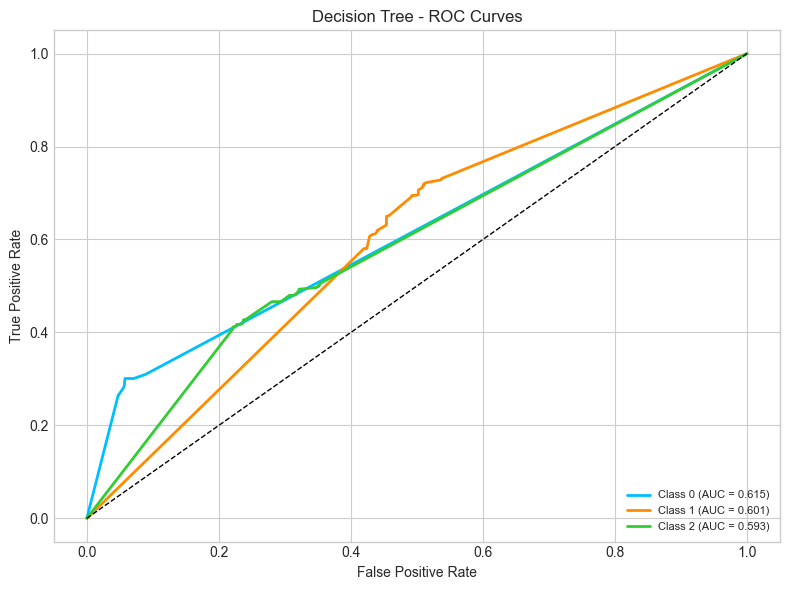


Random Forest
Training Accuracy: 93.40%
Testing Accuracy:  60.28%

              precision    recall  f1-score   support

           0       0.41      0.20      0.27       113
           1       0.62      0.84      0.72       982
           2       0.56      0.28      0.37       592

    accuracy                           0.60      1687
   macro avg       0.53      0.44      0.45      1687
weighted avg       0.58      0.60      0.57      1687

Confusion Matrix (raw counts):
[[ 23  86   4]
 [ 25 828 129]
 [  8 418 166]] 



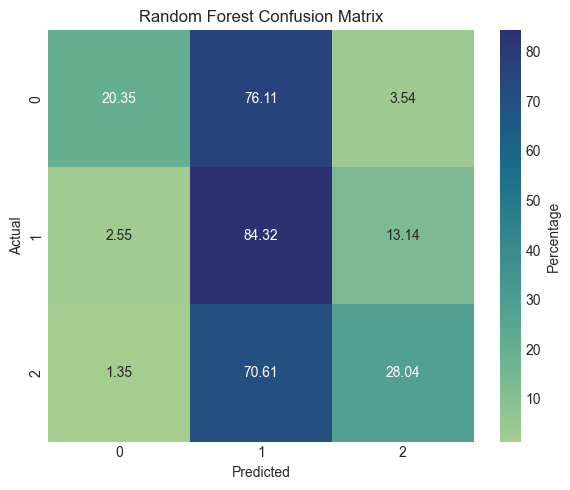

Macro ROC-AUC: 0.708



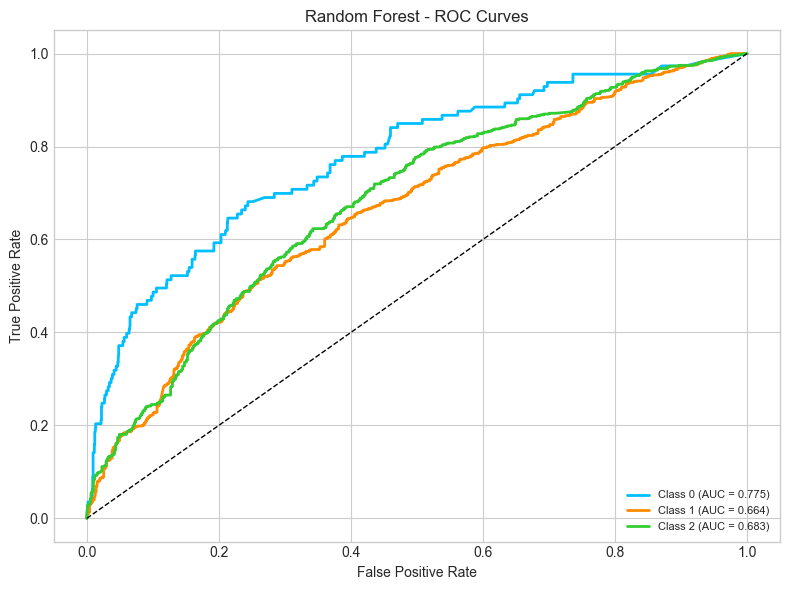


XGBoost
Training Accuracy: 93.31%
Testing Accuracy:  62.24%

              precision    recall  f1-score   support

           0       0.42      0.26      0.32       113
           1       0.67      0.73      0.70       982
           2       0.55      0.51      0.53       592

    accuracy                           0.62      1687
   macro avg       0.55      0.50      0.52      1687
weighted avg       0.61      0.62      0.62      1687

Confusion Matrix (raw counts):
[[ 29  66  18]
 [ 32 718 232]
 [  8 281 303]] 



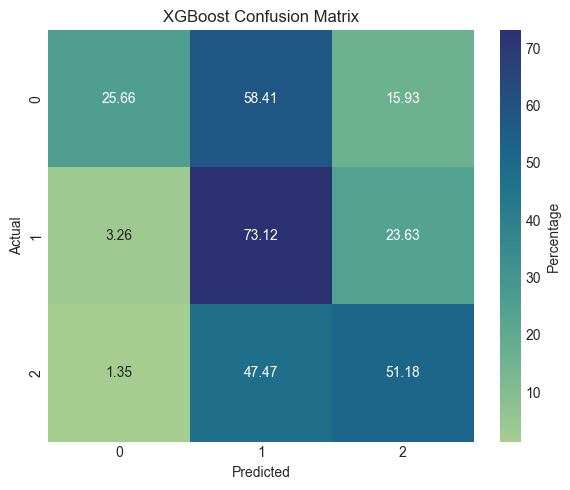

Macro ROC-AUC: 0.717



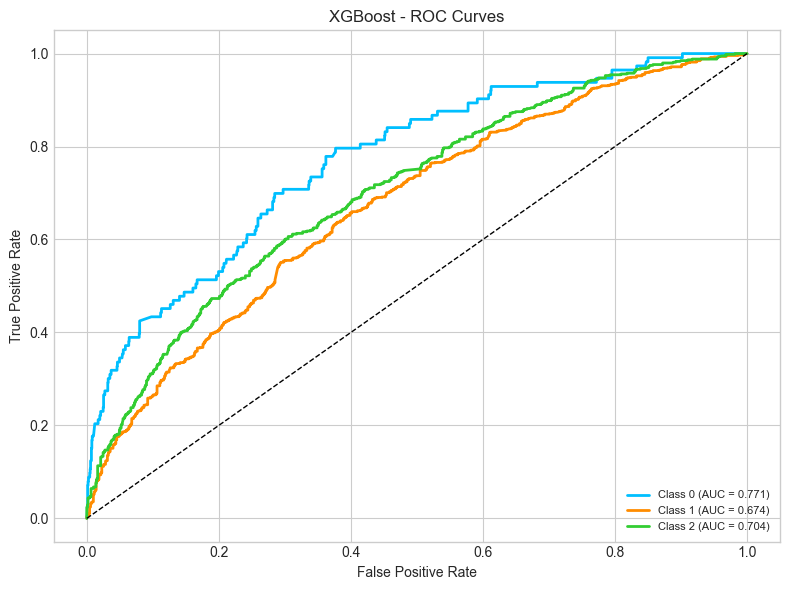

In [37]:
# Model Setup with Class Weights
num_classes = len(classes)

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000, solver='lbfgs', random_state=42, multi_class='ovr',
        class_weight=class_weights_dict
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42, class_weight=class_weights_dict
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1,
        class_weight=class_weights_dict
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softprob',
        num_class=num_classes,
        n_estimators=300,
        learning_rate=0.1,
        random_state=42
    )
}


# Helper Functions
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap='crest',
        xticklabels=labels, yticklabels=labels,
        cbar_kws={'label': 'Percentage'}
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc_auc(y_test_bin, y_prob, name, num_classes):
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    colors = cycle(['#00BFFF', '#FF8C00', '#32CD32', '#DC143C', '#8A2BE2'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

    plt.plot([0,1], [0,1], 'k--', lw=1)
    plt.title(f"{name} - ROC Curves")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()


# Training and Evaluation
# Binarize y_test for ROC-AUC
y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))

results = []

for name, model in models.items():
    print(f"\n{'='*45}\n{name}\n{'='*45}")

    # XGBoost handles class imbalance differently. We use sample_weight
    if name == "XGBoost":
        from sklearn.utils.class_weight import compute_sample_weight
        sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
        model.fit(X_train_svd, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_svd, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_svd)
    y_test_pred = model.predict(X_test_svd)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Testing Accuracy:  {test_acc*100:.2f}%\n")

    # Classification Report
    report = classification_report(y_test, y_test_pred, output_dict=True)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm_raw = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (raw counts):")
    print(cm_raw, "\n")

    cm_norm = confusion_matrix(y_test, y_test_pred, normalize='true') * 100
    plot_confusion_matrix(cm_norm, labels=np.unique(y_test), title=f"{name} Confusion Matrix")

    # ROC-AUC
    macro_roc_auc = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_svd)
        macro_roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
        print(f"Macro ROC-AUC: {macro_roc_auc:.3f}\n")
        plot_roc_auc(y_test_bin, y_prob, name, num_classes)
    else:
        print("ROC-AUC not available for this model.\n")

    # Store metrics
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Macro F1': report['macro avg']['f1-score'],
        'Weighted F1': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'ROC-AUC (macro)': macro_roc_auc
    })


# Summary Table
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)

numeric_cols = results_df.select_dtypes(include='number').columns
style_dict = {col: "{:.3f}" for col in numeric_cols}

results_df_styled = (
    results_df.style
    .background_gradient(cmap='Blues', subset=numeric_cols)
    .format(style_dict)
    .set_caption("Model Performance Summary Using Class Weights")
)

display(results_df_styled)

### MODEL SELECTION FOR HYPERPARAMETER TUNING

After evaluating multiple model configurations on our target, we identified the top candidates for hyperparameter tuning.

#### KEY OBSERVATIONS

- **Vanilla models** tend to be biased towards the majority classes, limiting their effectiveness in imbalanced settings.
- **Handling class imbalance** via SMOTE or class weights improved macro F1 scores and ensures better performance across all classes.
- **SVD-based dimensionality reduction** did not significantly improve test accuracy or macro F1 for most models.

### SELECTED MODELS

The three models chosen for hyperparameter tuning are:

| Model                     | Imbalance Handling | Test Accuracy | Macro F1 | ROC-AUC (macro) | Notes                                           |
|----------------------------|-----------------|---------------|----------|-----------------|------------------------------------------------|
| XGBoost (SMOTE)           | SMOTE           | 0.618         | 0.527    | 0.716           | Strong balanced performance, synthetic oversampling |
| XGBoost (Class Weights)   | Class Weights   | 0.618         | 0.505    | 0.714           | Native imbalance handling without oversampling |
| Random Forest (SMOTE)     | SMOTE           | 0.622         | 0.525    | 0.711           | Baseline with oversampling            |


These three models provide a balance between **robust handling of class imbalance**, **high macro F1**, and **good overall predictive performance**, making them ideal candidates for hyperparameter tuning.

## HYPERPARAMETER TUNING

In [38]:
# Define pipelines

# XGBoost (SMOTE)
xgb_smote_pipe = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        random_state=42,
        objective='multi:softprob',
        eval_metric='mlogloss'
    ))
])

xgb_smote_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}


# XGBoost (Class Weights)
xgb_weights_pipe = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        random_state=42,
        objective='multi:softprob',
        eval_metric='mlogloss',
        scale_pos_weight=None  # Auto-adjusted via sample_weights
    ))
])

xgb_weights_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}


# Random Forest (SMOTE)
rf_smote_pipe = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

rf_smote_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}


# Define grid search setup
models = {
    'XGB (SMOTE)': (xgb_smote_pipe, xgb_smote_params),
    'XGB (Class Weights)': (xgb_weights_pipe, xgb_weights_params),
    'RF (SMOTE)': (rf_smote_pipe, rf_smote_params)
}

results = []

for name, (pipe, params) in models.items():
    print(f"\n Tuning {name}...")
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=3,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    roc = roc_auc_score(pd.get_dummies(y_test), grid.predict_proba(X_test), multi_class='ovr')
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': round(acc, 3),
        'F1 (macro)': round(f1, 3),
        'ROC-AUC (macro)': round(roc, 3)
    })

# Summarize results
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 (macro)', ascending=False)


 Tuning XGB (SMOTE)...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

 Tuning XGB (Class Weights)...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

 Tuning RF (SMOTE)...
Fitting 3 folds for each of 72 candidates, totalling 216 fits


Model  \
2           RF (SMOTE)   
0          XGB (SMOTE)   
1  XGB (Class Weights)   

                                                                                                                                     Best Params  \
2  {'model__bootstrap': True, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}   
0      {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}   
1      {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}   

   Accuracy  F1 (macro)  ROC-AUC (macro)  
2     0.636       0.541            0.721  
0     0.629       0.518            0.727  
1     0.649       0.479            0.728

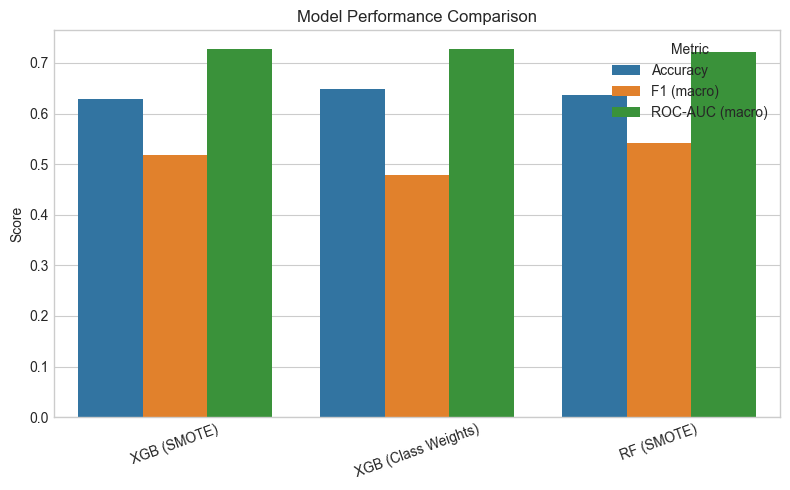

Model  \
0          XGB (SMOTE)   
1  XGB (Class Weights)   
2           RF (SMOTE)   

                                                                                                                                     Best Params  \
0      {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}   
1      {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}   
2  {'model__bootstrap': True, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}   

   Accuracy  F1 (macro)  ROC-AUC (macro)  
0     0.629       0.518            0.727  
1     0.649       0.479            0.728  
2     0.636       0.541            0.721

In [39]:
# Sort and visualize model comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars='Model', 
                                 value_vars=['Accuracy', 'F1 (macro)', 'ROC-AUC (macro)']),
            x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Metric")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()





 Evaluating XGB (SMOTE)...

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.29      0.30       113
           1       0.69      0.74      0.71       982
           2       0.57      0.51      0.54       592

    accuracy                           0.63      1687
   macro avg       0.52      0.51      0.52      1687
weighted avg       0.62      0.63      0.62      1687



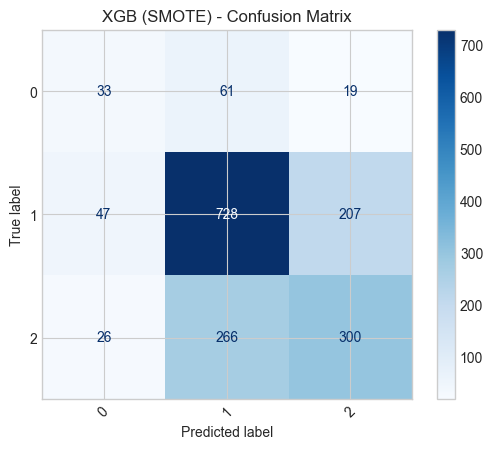

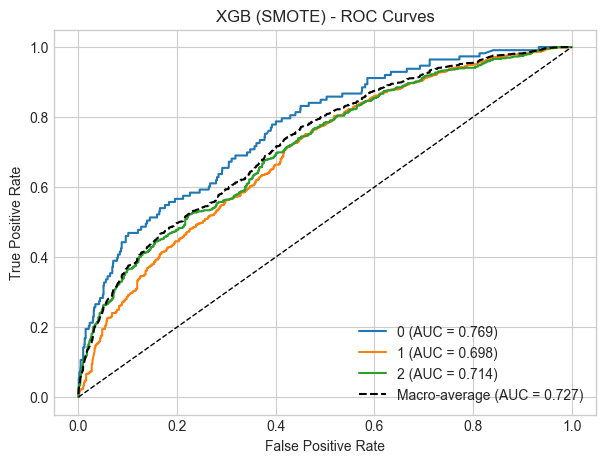

Macro-average ROC-AUC: 0.727

 Evaluating XGB (Class Weights)...

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.12      0.21       113
           1       0.66      0.86      0.75       982
           2       0.62      0.40      0.48       592

    accuracy                           0.65      1687
   macro avg       0.63      0.46      0.48      1687
weighted avg       0.64      0.65      0.62      1687



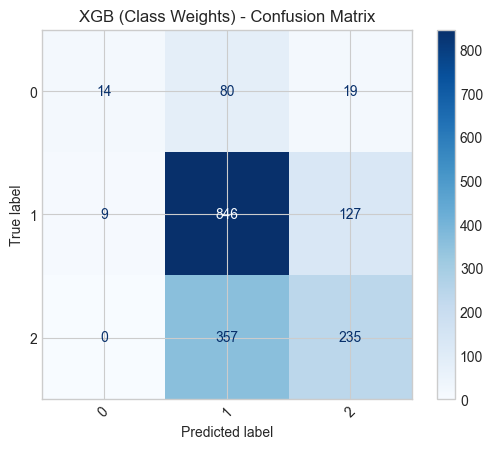

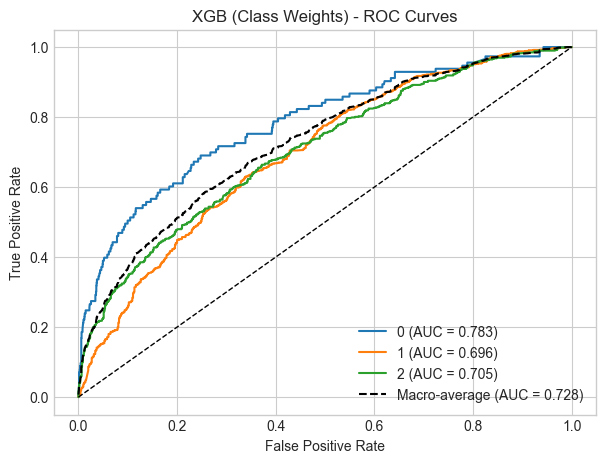

Macro-average ROC-AUC: 0.728

 Evaluating RF (SMOTE)...

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.34      0.36       113
           1       0.69      0.74      0.71       982
           2       0.57      0.53      0.55       592

    accuracy                           0.64      1687
   macro avg       0.55      0.53      0.54      1687
weighted avg       0.63      0.64      0.63      1687



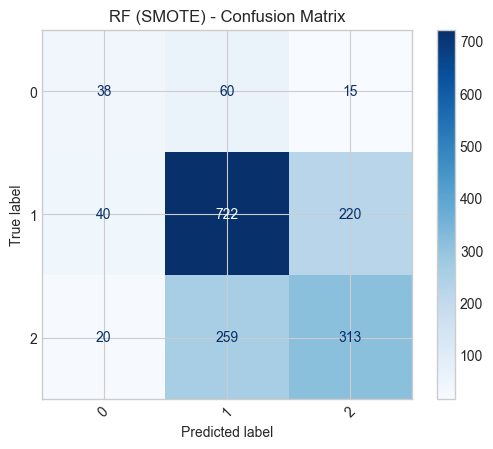

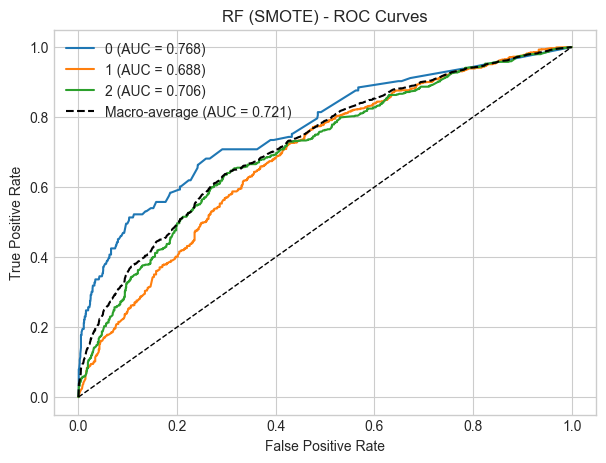

Macro-average ROC-AUC: 0.721


In [41]:

# Reuse best hyperparameters found earlier
best_params = {
    'XGB (SMOTE)': {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8},
    'XGB (Class Weights)': {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8},
    'RF (SMOTE)': {'model__bootstrap': True, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
}

for name, (pipe, _) in models.items():
    print(f"\n Evaluating {name}...")

    # Apply best parameters
    pipe.set_params(**best_params[name])

    # Fit the model
    pipe.fit(X_train, y_train)

    # Predictions and probabilities
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve (Multi-class)
    y_test_bin = pd.get_dummies(y_test, drop_first=False)
    fpr, tpr, roc_auc = {}, {}, {}
    for i, col in enumerate(y_test_bin.columns):
        fpr[col], tpr[col], _ = roc_curve(y_test_bin.iloc[:, i], y_proba[:, i])
        roc_auc[col] = auc(fpr[col], tpr[col])

    # Macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in y_test_bin.columns]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in y_test_bin.columns:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(y_test_bin.columns)
    macro_roc_auc = auc(all_fpr, mean_tpr)

    # Plot ROC
    plt.figure(figsize=(7, 5))
    for col in y_test_bin.columns:
        plt.plot(fpr[col], tpr[col], label=f"{col} (AUC = {roc_auc[col]:.3f})")
    plt.plot(all_fpr, mean_tpr, label=f"Macro-average (AUC = {macro_roc_auc:.3f})", color='black', linestyle='--')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title(f"{name} - ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    print(f"Macro-average ROC-AUC: {macro_roc_auc:.3f}")


## model Evaluation Summary and Next Steps

After performing hyperparameter tuning and evaluating our models, the following insights were obtained:

- **Top Performing Models:**
  - **Random Forest (SMOTE):** F1 (macro) = 0.541, ROC-AUC = 0.721, Accuracy = 0.636  
  - **XGBoost (SMOTE):** F1 (macro) = 0.518, ROC-AUC = 0.727, Accuracy = 0.629  
  - **XGBoost (Class Weights):** F1 (macro) = 0.479, ROC-AUC = 0.728, Accuracy = 0.649  

- **Observations:**
  - All models performed moderately well, with XGBoost (SMOTE) and Random Forest (SMOTE) showing balanced performance across classes.
  - Class 0 remains challenging for all models, indicating some degree of class imbalance.
  - ROC-AUC scores above 0.72 show reasonable model separability.

- **Next Steps:**
  1. Analyze **feature importance** for the top models (RF and XGB with SMOTE) to understand key predictors influencing sentiment.
  2. Use the insights from feature importance to guide **ensemble modeling** (Voting and Stacking) to improve overall performance.


In [46]:
# Collect evaluation metrics after retraining
final_results = []

for name, (pipe, _) in models.items():
    pipe.set_params(**best_params[name])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    roc = roc_auc_score(pd.get_dummies(y_test), y_proba, multi_class='ovr')

    final_results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'F1 (macro)': round(f1, 3),
        'ROC-AUC (macro)': round(roc, 3)
    })

# Create new evaluation DataFrame
eval_results_df = pd.DataFrame(final_results)
eval_results_df = eval_results_df.sort_values(by='F1 (macro)', ascending=False)
display(eval_results_df)


Model  Accuracy  F1 (macro)  ROC-AUC (macro)
2           RF (SMOTE)     0.636       0.541            0.721
0          XGB (SMOTE)     0.629       0.518            0.727
1  XGB (Class Weights)     0.649       0.479            0.728

In [47]:
# Select top 2 models for ensembling
top_models = eval_results_df.head(2)
display(top_models)

best_model_names = top_models['Model'].tolist()
print(f" Models selected for ensemble: {best_model_names}")

# Safety net: ensure always 2 models
if len(best_model_names) < 2:
    best_model_names = eval_results_df['Model'].tolist()[:2]
    print(" Only one model met criteria — defaulting to top two overall.")
    print(f"Selected: {best_model_names}")


Model  Accuracy  F1 (macro)  ROC-AUC (macro)
2   RF (SMOTE)     0.636       0.541            0.721
0  XGB (SMOTE)     0.629       0.518            0.727

 Models selected for ensemble: ['RF (SMOTE)', 'XGB (SMOTE)']



🔍 Feature Importance for RF (SMOTE):


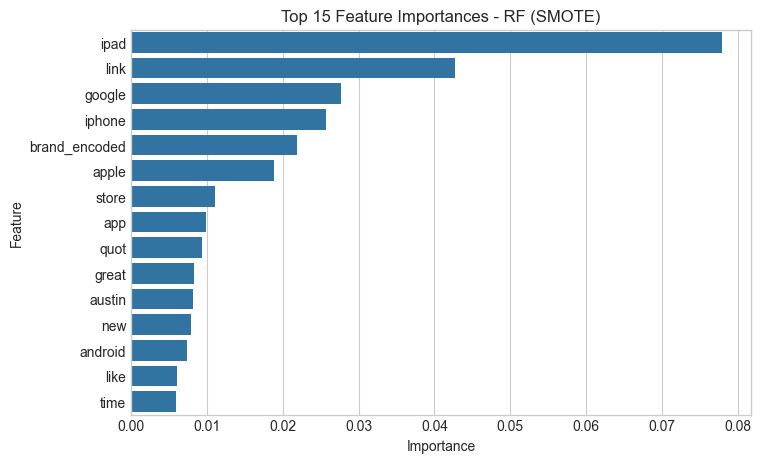


🔍 Feature Importance for XGB (SMOTE):


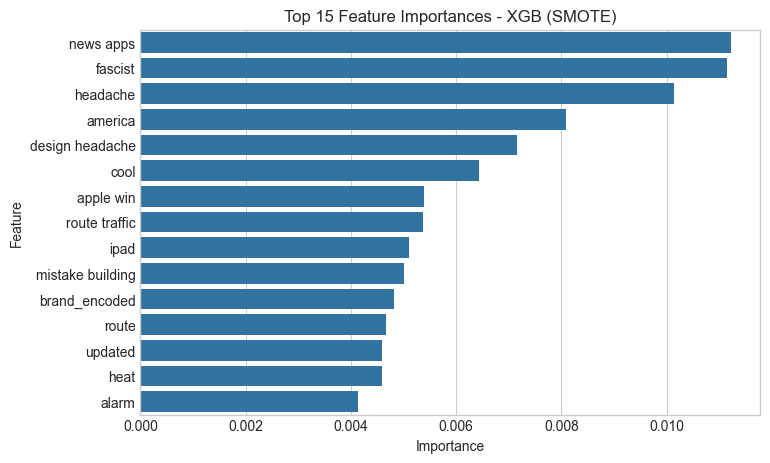

In [48]:
# Focus on top 2 models selected earlier
selected_models = ['RF (SMOTE)', 'XGB (SMOTE)']

for name in selected_models:
    model = models[name][0].named_steps['model']  # Access the trained model inside the pipeline

    print(f"\n Feature Importance for {name}:")

    # Handle Random Forest
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        features = X_train.columns
        fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        fi_df = fi_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(8, 5))
        sns.barplot(x='Importance', y='Feature', data=fi_df.head(15))
        plt.title(f"Top 15 Feature Importances - {name}")
        plt.show()

    # Handle XGBoost
    elif "xgboost" in str(type(model)).lower():
        importances = model.feature_importances_
        features = X_train.columns
        fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        fi_df = fi_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(8, 5))
        sns.barplot(x='Importance', y='Feature', data=fi_df.head(15))
        plt.title(f"Top 15 Feature Importances - {name}")
        plt.show()


## Feature Importance Analysis (RF & XGB)

After retraining with the best hyperparameters, we analyzed feature importance for the two top-performing models: **Random Forest (SMOTE)** and **XGBoost (SMOTE)**.

- **RF (SMOTE)** placed high emphasis on features like *ipad*, *link*, *google*, and *iphone*, suggesting that product- or tech-related keywords drive much of its predictive power.  
- **XGB (SMOTE)** highlighted terms such as *news apps*, *fascist*, *headache*, and *america*, indicating its ability to capture more subtle and context-driven patterns.

These insights confirm that both models learn different aspects of the dataset — which supports our plan to **combine them using ensemble methods** to leverage their complementary strengths.


In [52]:

print("OVERFITTING ANALYSIS")


overfitting_results = []

for name, (pipe, _) in models.items():
    # Get already fitted pipe
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    gap = train_f1 - test_f1
    
    print(f"\n{name}:")
    print(f"  Train F1: {train_f1:.4f}")
    print(f"  Test F1:  {test_f1:.4f}")
    print(f"  Gap:      {gap:.4f}", end="")
    
    if gap > 0.20:
        print("  SEVERE - Must fix!")
        status = " Severe"
    elif gap > 0.15:
        print("   HIGH - Should fix")
        status = " High"
    elif gap > 0.10:
        print("   Moderate")
        status = " Moderate"
    else:
        print(" Acceptable")
        status = "Good"
    
    overfitting_results.append({
        'Model': name,
        'Train F1': round(train_f1, 4),
        'Test F1': round(test_f1, 4),
        'Gap': round(gap, 4),
        'Status': status
    })

# Display table
overfitting_df = pd.DataFrame(overfitting_results).sort_values('Gap', ascending=False)

display(overfitting_df)

OVERFITTING ANALYSIS

XGB (SMOTE):
  Train F1: 0.7369
  Test F1:  0.5176
  Gap:      0.2193 ❌ SEVERE - Must fix!

XGB (Class Weights):
  Train F1: 0.7024
  Test F1:  0.4786
  Gap:      0.2238 ❌ SEVERE - Must fix!

RF (SMOTE):
  Train F1: 0.9223
  Test F1:  0.5410
  Gap:      0.3812 ❌ SEVERE - Must fix!



Model  Train F1  Test F1     Gap    Status
2           RF (SMOTE)    0.9223   0.5410  0.3812  ❌ Severe
1  XGB (Class Weights)    0.7024   0.4786  0.2238  ❌ Severe
0          XGB (SMOTE)    0.7369   0.5176  0.2193  ❌ Severe

In [53]:

print("REGULARIZING SELECTED MODELS")


# Models to fix
selected_models = ['RF (SMOTE)', 'XGB (SMOTE)']

# Regularized parameters
regularized_params = {
    'RF (SMOTE)': {
        'model__max_depth': 15,           # Was None (unlimited)
        'model__min_samples_split': 20,   # Was 2
        'model__min_samples_leaf': 10,    # Was 1
        'model__max_samples': 0.7,        # New - limit bootstrap
        'model__bootstrap': True,
        'model__n_estimators': 100
    },
    'XGB (SMOTE)': {
        'model__max_depth': 5,            # Was 7
        'model__learning_rate': 0.05,     # Was 0.1
        'model__n_estimators': 150,       # Was 200
        'model__subsample': 0.7,          # Was 0.8
        'model__colsample_bytree': 0.7,   # Was 0.8
        'model__min_child_weight': 5,     # New
        'model__gamma': 0.3,              # New
        'model__reg_alpha': 1.0,          # New - L1
        'model__reg_lambda': 2.0          # New - L2
    }
}

regularized_results = []

for name in selected_models:
    print(f"\n{'='*60}")
    print(f"Regularizing {name}...")
    print('='*60)
    
    # Get pipe and apply regularized params
    pipe, _ = models[name]
    pipe.set_params(**regularized_params[name])
    
    # Retrain
    pipe.fit(X_train, y_train)
    
    # Evaluate
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    new_gap = train_f1 - test_f1
    
    # Get old gap from overfitting_df
    old_gap = overfitting_df[overfitting_df['Model'] == name]['Gap'].values[0]
    
    print(f"\nBEFORE → AFTER:")
    print(f"  Gap: {old_gap:.4f} → {new_gap:.4f}", end="")
    
    if new_gap < 0.15:
        print("  Fixed!")
        status = " Fixed"
    elif new_gap < old_gap:
        print("   Improved but still high")
        status = " Better"
    else:
        print("  Worse")
        status = " Worse"
    
    regularized_results.append({
        'Model': name,
        'Old Gap': round(old_gap, 4),
        'New Gap': round(new_gap, 4),
        'Train F1': round(train_f1, 4),
        'Test F1': round(test_f1, 4),
        'Status': status
    })

# Display results

print("REGULARIZATION RESULTS")

regularized_df = pd.DataFrame(regularized_results)
display(regularized_df)

REGULARIZING SELECTED MODELS

Regularizing RF (SMOTE)...

BEFORE → AFTER:
  Gap: 0.3812 → 0.0437  Fixed!

Regularizing XGB (SMOTE)...

BEFORE → AFTER:
  Gap: 0.2193 → 0.0747  Fixed!
REGULARIZATION RESULTS


Model  Old Gap  New Gap  Train F1  Test F1  Status
0   RF (SMOTE)   0.3812   0.0437    0.4912   0.4475   Fixed
1  XGB (SMOTE)   0.2193   0.0747    0.5569   0.4822   Fixed

In [54]:

print("MODEL DIVERSITY CHECK")

# Get predictions from regularized models
rf_pred = models['RF (SMOTE)'][0].predict(X_test)
xgb_pred = models['XGB (SMOTE)'][0].predict(X_test)

# 1. Agreement
agreement = (rf_pred == xgb_pred).mean()
print(f"\nAgreement: {agreement:.3f}")
print(f"Disagreement: {1-agreement:.3f} ({(1-agreement)*100:.1f}% of predictions)")

if agreement > 0.85:
    print("  Too similar - ensemble may not help much")
else:
    print(" Good diversity - ensemble should help")

# 2. Error correlation
rf_errors = (rf_pred != y_test).astype(int)
xgb_errors = (xgb_pred != y_test).astype(int)
error_corr = pd.DataFrame({'RF': rf_errors, 'XGB': xgb_errors}).corr().iloc[0,1]

print(f"\nError Correlation: {error_corr:.3f}")
if error_corr < 0.6:
    print("Low correlation - models make different errors")
else:
    print("  High correlation - models make similar errors")

MODEL DIVERSITY CHECK

Agreement: 0.722
Disagreement: 0.278 (27.8% of predictions)
 Good diversity - ensemble should help

Error Correlation: 0.554
Low correlation - models make different errors


In [56]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score

print("ENSEMBLE CROSS-VALIDATION")

# Get regularized pipes
estimators = [
    ('RF', models['RF (SMOTE)'][0]),
    ('XGB', models['XGB (SMOTE)'][0])
]

# Individual model CV scores
print("\nIndividual Models (5-Fold CV):")


for name, pipe in estimators:
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, 
                                 scoring='f1_macro', n_jobs=-1)
    print(f"{name:10} F1: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Voting Ensemble

print("VOTING ENSEMBLE:")
voting_clf = VotingClassifier(estimators, voting='soft', n_jobs=-1)
voting_cv = cross_val_score(voting_clf, X_train, y_train, cv=5, 
                             scoring='f1_macro', n_jobs=-1)
print(f"Voting F1: {voting_cv.mean():.4f} (+/- {voting_cv.std():.4f})")



ENSEMBLE CROSS-VALIDATION

Individual Models (5-Fold CV):
RF         F1: 0.4603 (+/- 0.0191)
XGB        F1: 0.4817 (+/- 0.0114)
VOTING ENSEMBLE:
Voting F1: 0.4864 (+/- 0.0104)


In [57]:
# Stacking Ensemble

print("STACKING ENSEMBLE:")
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)
stacking_cv = cross_val_score(stacking_clf, X_train, y_train, cv=5, 
                               scoring='f1_macro', n_jobs=-1)
print(f"Stacking F1: {stacking_cv.mean():.4f} (+/- {stacking_cv.std():.4f})")




STACKING ENSEMBLE:
Stacking F1: 0.4312 (+/- 0.0177)


In [58]:

print("RECOMMENDATION:")

# Compare all
best_score = max(voting_cv.mean(), stacking_cv.mean())
if voting_cv.mean() == best_score:
    print(" Use VOTING ENSEMBLE")
elif stacking_cv.mean() == best_score:
    print(" Use STACKING ENSEMBLE")

RECOMMENDATION:
 Use VOTING ENSEMBLE


In [59]:

print("FINAL VOTING ENSEMBLE")

# Train voting ensemble on full training data
voting_clf.fit(X_train, y_train)

# Get predictions
y_pred_voting = voting_clf.predict(X_test)
y_pred_rf = models['RF (SMOTE)'][0].predict(X_test)
y_pred_xgb = models['XGB (SMOTE)'][0].predict(X_test)

# Calculate F1 scores
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_voting = f1_score(y_test, y_pred_voting, average='macro')

# Results comparison
print("\nFINAL TEST RESULTS:")

print(f"RF (SMOTE):       {f1_rf:.4f}")
print(f"XGB (SMOTE):      {f1_xgb:.4f}")
print(f"VOTING ENSEMBLE:  {f1_voting:.4f}")

improvement = f1_voting - max(f1_rf, f1_xgb)
print(f"Improvement:      {improvement:+.4f}")



FINAL VOTING ENSEMBLE

FINAL TEST RESULTS:
RF (SMOTE):       0.4475
XGB (SMOTE):      0.4822
VOTING ENSEMBLE:  0.4805
Improvement:      -0.0017


In [60]:
# Classification Report

print("ENSEMBLE CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_voting))



ENSEMBLE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.20      0.29      0.24       113
           1       0.68      0.73      0.70       982
           2       0.56      0.45      0.50       592

    accuracy                           0.60      1687
   macro avg       0.48      0.49      0.48      1687
weighted avg       0.61      0.60      0.60      1687



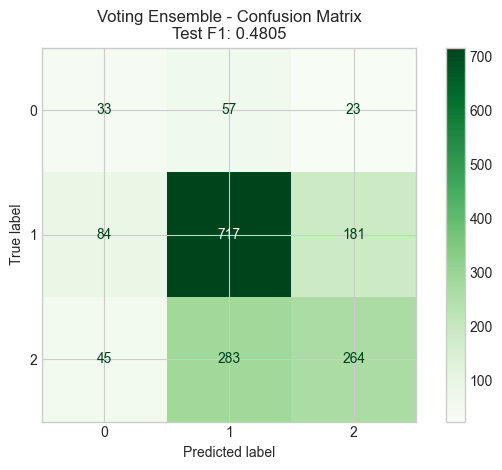

In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens')
plt.title(f'Voting Ensemble - Confusion Matrix\nTest F1: {f1_voting:.4f}')
plt.tight_layout()
plt.show()


VOTING ENSEMBLE - ROC-AUC


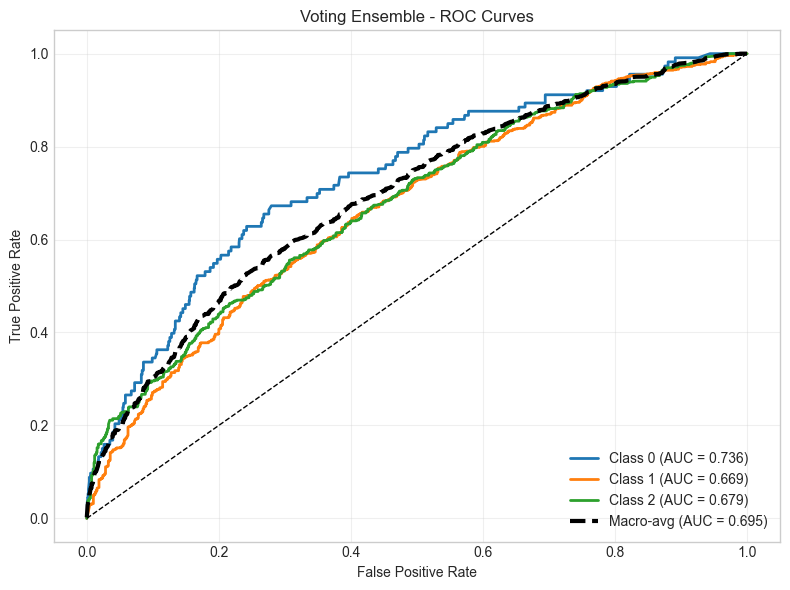


Macro-average ROC-AUC: 0.695


In [62]:

print("VOTING ENSEMBLE - ROC-AUC")

# Get probabilities
y_proba_voting = voting_clf.predict_proba(X_test)

# Binarize labels
y_test_bin = pd.get_dummies(y_test, drop_first=False)

# Calculate ROC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i, col in enumerate(y_test_bin.columns):
    fpr[col], tpr[col], _ = roc_curve(y_test_bin.iloc[:, i], y_proba_voting[:, i])
    roc_auc[col] = auc(fpr[col], tpr[col])

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in y_test_bin.columns]))
mean_tpr = np.zeros_like(all_fpr)
for i in y_test_bin.columns:
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(y_test_bin.columns)
macro_roc_auc = auc(all_fpr, mean_tpr)

# Plot
plt.figure(figsize=(8, 6))
for col in y_test_bin.columns:
    plt.plot(fpr[col], tpr[col], linewidth=2,
             label=f'Class {col} (AUC = {roc_auc[col]:.3f})')
plt.plot(all_fpr, mean_tpr, color='black', linestyle='--', linewidth=3,
         label=f'Macro-avg (AUC = {macro_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Ensemble - ROC Curves')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMacro-average ROC-AUC: {macro_roc_auc:.3f}")

In [63]:

print("ANALYSIS: WHY ENSEMBLE DIDN'T HELP")

# Check if regularization made models too similar
rf_pred = models['RF (SMOTE)'][0].predict(X_test)
xgb_pred = models['XGB (SMOTE)'][0].predict(X_test)

# Predictions where they differ
differ_mask = rf_pred != xgb_pred
differ_count = differ_mask.sum()

print(f"\nPredictions where models differ: {differ_count} ({differ_count/len(y_test)*100:.1f}%)")

# Check which model is better on disagreements
rf_correct_on_differ = (rf_pred[differ_mask] == y_test[differ_mask]).sum()
xgb_correct_on_differ = (xgb_pred[differ_mask] == y_test[differ_mask]).sum()

print(f"\nOn disagreed samples:")
print(f"  RF correct:  {rf_correct_on_differ}/{differ_count} ({rf_correct_on_differ/differ_count*100:.1f}%)")
print(f"  XGB correct: {xgb_correct_on_differ}/{differ_count} ({xgb_correct_on_differ/differ_count*100:.1f}%)")


print("RECOMMENDATION:")

print(f"\n Use XGB (SMOTE) as final model (F1: 0.4822)")
print("  Ensemble provides no benefit in this case.")
print("\n The regularization reduced overfitting but also made models")
print("   more conservative and similar to each other.")

ANALYSIS: WHY ENSEMBLE DIDN'T HELP

Predictions where models differ: 469 (27.8%)

On disagreed samples:
  RF correct:  118/469 (25.2%)
  XGB correct: 261/469 (55.7%)
RECOMMENDATION:

 Use XGB (SMOTE) as final model (F1: 0.4822)
  Ensemble provides no benefit in this case.

 The regularization reduced overfitting but also made models
   more conservative and similar to each other.


# Analysis Summary: Why Ensemble Didn’t Help

## Key Findings:

The two models (Random Forest and XGBoost) disagreed on 27.8% of the samples.

On those disagreements, XGBoost was correct 55.7% of the time, while Random Forest was correct only 25.2% of the time.

Regularization successfully reduced overfitting but also made both models more conservative and similar, reducing the diversity needed for a strong ensemble.

Interpretation:
- Since both models behave similarly and XGBoost outperforms Random Forest on difficult samples, the ensemble fails to provide any additional benefit. The models’ reduced variance (due to regularization) further limits ensemble gains.

# Recommendations

- Use XGBoost (SMOTE) as the Final Model

- XGBoost demonstrates the best overall performance (F1: 0.4822) and handles complex cases better than Random Forest.

- Deploy XGB (SMOTE) as the final, production-ready model.

- Avoid Simple Ensembling

- Combining similar tree-based models offers no benefit when model diversity is low.

- Focus instead on tuning XGBoost hyperparameters or introducing different model families for future ensembles.

- Adjust Regularization Carefully

- Regularization reduced overfitting but may have been too strict, limiting model flexibility.

Test slightly deeper trees, higher learning rates, or relaxed regularization parameters (e.g., max_depth, gamma, min_child_weight).

Enhance Data Diversity

Explore advanced resampling methods such as ADASYN or SMOTEENN to address remaining imbalance.

Consider feature engineering or feature selection to reveal new patterns for the model to learn.

Evaluate Beyond F1 Score

Complement F1 with Precision–Recall AUC and Calibration Curves to assess reliability and class sensitivity.

This provides a fuller picture of model performance on imbalanced data.

Future Exploration

If ensemble performance is desired, try stacking (a meta-learner) instead of simple averaging.

Combine diverse model types (e.g., XGBoost + Logistic Regression or a Neural Network) to maximize complementarity.

In [ ]:
# Save model
import joblib
joblib.dump(voting_clf, 'voting_ensemble_final.pkl')
print("\n✅ Model saved: voting_ensemble_final.pkl")